# Machine Learning Series 
## Part 1 - An Introduction to ML
David Ramirez 
<br>Levi Conall

### ***Disclaimer: While it looks like there is a lot of code in the notebook, a lot of code was duplicated for demonstration purposes.***

## Table of Contents
1. [Introduction](#Introduction)
    1. [Artificial Intelligence](#Artificial-Intelligence)
    2. [Machine Learning](#Machine-Learning)
    <br/><br/>
2. [Supervised vs. Unsupervised Learning](#Supervised-vs-Unsupervised-Learning)
    1. [Supervised](#Supervised)
    2. [Unsupervised](#Unsupervised)
    3. [Aside on Semi-Supervised](#Aside-on-Semi-Supervised)
    <br/><br/>
3. [Directory Structure](#Directory-Structure)
<br/><br/>
4. [Datasets](#Datasets)
    1. [Dataset Types](#Dataset-Types)
        1. [Training](#Dataset-Types-Training)
        2. [Validation](#Dataset-Types-Validation)
        3. [Test](#Dataset-Types-Test)
        <br/><br/>
    2. [Dataset Structure](#Dataset-Structure)
        1. [Dataset with Class Variable](#Dataset-with-Class-Variable)
        2. [Dataset without Class Variable](#Dataset-without-Class-Variable)
        3. [Class Variable Storage](#Class-Variable-Storage)
    <br/><br/>
    3. [Our Dataset for this Lesson](#Our-Dataset-for-this-Lesson)
    <br/><br/>
    4. [Setting up the Datasets](#Setting-up-the-Datasets)
    <br/><br/>
5. [Data Types](#Data-Types)
    1. [TensorFlow Aside](#TensorFlow-Aside)
    2. [Continuous Data](#Continuous-Data)
    3. [Categorical Data](#Categorical-Data)
    <br/><br/>
6. [Feature Type Definitions](#Feature-Type-Definitions)    
    1. [Base Features](#Base-Features)
    2. [Derived Features](#Derived-Features)
    <br/><br/>
7. [Examples](#Examples)
    1. [Unsupervised Learning Example](#Unsupervised-Learning-Example)
        2. [K-Means](#K-Means)
    <br/><br/>
    2. [Supervised Learning Examples](#Supervised-Learning-Examples)
        1. [Linear Regression](#Linear-Regression)
        2. [The Perceptron](#The-Perceptron)
        3. [Logistic Regression](#Logistic-Regression)
        4. [Neural Networks and Deep Learning](#Neural-Networks-and-Deep-Learning)
        5. [Combining Concepts](#Combining-Concepts)
        <br/><br/>
8. [TensorBoard](#TensorBoard)
    1. [Running TensorBoard](#Running-TensorBoard)
    <br/><br/>
9. [References](#References)
<br/><br/>

## Introduction

## Artificial Intelligence 

### Some definitions from around the web

- "The theory and development of computer systems able to perform tasks that normally require human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages."


- "In computer science AI research is defined as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals." 

<a id="Machine-Learning"></a>
## What is Machine Learning(ML)?

### Some definitions from around the web
- "An application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it to learn for themselves."


- "A field of computer science that uses statistical techniques to give computer systems the ability to "learn" (i.e., progressively improve performance on a specific task) with data, without being explicitly programmed."


- "The field of machine learning is concerned with the question of how to construct computer programs that automatically improve with experience."

### In simple terms
You want a machine to learn how to do something well without having to tell it exactly how it should go about it, and get better at it as it goes along.

<a id="Supervised-vs-Unsupervised-Learning"></a>
## Supervised vs. Unsupervised

There are tons of algorithms out there, but in this class we will focus on a few supervised and unsupervised learning examples. 

### Supervised

The goal with supervised learning is to build an algorithm that has access to input/output pairs that it can use to determine a pattern/function that allows it to map inputs to outputs.   

### Unsupervised

In unsupervised however, the learning algorithm has to determine patterns from inputs without given any explicit feedback.  A common form of unsupervised learning is clustering which is forming groups of input features that are closely related.


### Aside on Semi-Supervised

There is an interesting middle ground between supervised and unsupervised learning called semi-supervised learning. There are two main reasons why it's a gray area that could make it fit under either of the sections above.  One situation is that there could just not be enough data to fully determine the function most likely because it's either costly or time consuming to create a full dataset(*Spoiler look into Generative Adversarial Networks*).  The other reason is that the provided lables could have inaccuracies in them causing the model to get incorrect data that it's using to learn from.    
    

<a id="Directory-Structure"></a>
## Directory Structure

For this notebook we will be working with 2 main directories a data and a model directory. The following code sets the directories up in the following structure.

```
ML Series Part 1 - Introduction
|  MachineLearningSeries_Part1.ipynb
|
|__data
|    |  test
|    |  train
|    |  validation
|
|__models
|    |  combined
|    |  deepNN
|    |  kmeans
|    |  linear
|    |  logistic
|    |  perceptron
|
```        

In [1]:
# Setup required directories
import os # importing os to create directories


# Setup data directory paths
data_dirs = {"train": "./data/train/", 
             "validation": "./data/validation/",
             "test": "./data/test/",}
# Create data directories
for _, dir in data_dirs.items():
    if not os.path.exists(dir):
        os.makedirs(dir)

        
model_dirs={'combined': './models/combined',
            'deepNN': './models/deepNN',
            'kmeans': './models/kmeans',
            'linear': './models/linear',
            'logistic': './models/logistic',
            'perceptron': './models/perceptron'}

# Create data directories
for _, dir in model_dirs.items():
    if not os.path.exists(dir):
        os.makedirs(dir)


<a id="Datasets"></a>
## Datasets

Before we delve into any machine learning algorithms lets have a quick discussion about datasets.

When looking at the data you intend to build a ML algorithm for it's important to do some analysis related to the data and it's features before you start. 

Some things to think about when looking at a dataset are:
1. How many datasets do you have?
2. Is there a specific target class or classes in the dataset? 
3. Does the training dataset have an equal representation of each of the target classes? 
(**If not you might need to edit the dataset to ensure an even distribution**)
4. Are there any features that are particularly important? 
(**Don't waste domain knowlege. It might be able to improve the design of the algorithm**)
5. Is there any preprocessing that needs to be done on the data (e.g. Data Normalization, encoding)? 

<a id="Dataset-Types"></a>
### Dataset Types

It's typical to have at a minimum a training dataset and test dataset and if possible it's helpful to add in a third set for validation to make the algorithm more robust (often done by splitting the training set randomly into training and validation sets). These dataset types are described in more detail below.  

*Note: A typical dataset split of the data products is 60% for training, 20% for validation, and finally 20% for testing.*

<a id="Dataset-Types-Training"></a>
#### Training 
The training dataset is the data that the algorithm will learn a pattern from.  When designing this dataset it is important to think about the distribution of the target classes.  

**Note: If one class is over-represented, the algorithm could learn a relation to predict that class over others and cause your accuracy to look good but in reality it's ignoring the other classes.** 

<a id="Dataset-Types-Validation"></a>
#### Validation 
**--- *Should not be learned from directly by the algorithm* ---** 

This dataset is used to evaluate the performance of the algorithm as it is training.  It allows us to see trends and adjust the algorithm to improve the performance using the metaparameters such as number of training epochs(i.e. how many times the training loops through the training data) or training batch size(i.e. number of data products it learns from at a time). By tuning the model based off the validation set we can be indirectly optimizing the data for validation sets.    

<a id="Dataset-Types-Test"></a>
#### Test 
**--- *Should only be used for evaluation* ---** 

The test set is the dataset that should only be used to evaluate performance of the algorithm. By having three datasets and only using the test set for evaluation, it allows us to build a more generalized algorithm that isn't optimized for a particular dataset.

### Dataset Structure

#### Dataset with Class Variable

- In general the existence a class variable also indicates that you might want to consider a supervised algorithm (or semi-supervised if you have just a few labeled examples) because having a designated class can allow you to provided the system you are developing with feedback.

- Having a class variable in your dataset will mean that you will need to separate the dataset into a features set and a class set.  The reason being, you don't want your class variable becoming one of the inputs to the algorithm thus preventing it from learning the relationship/pattern you are looking for. 

```python 
# In TensorFow we will do this separation in the input function while parsing the data using these 3 lines of code.
columns = tf.decode_csv(value, record_defaults=CSV_COLUMN_DEFAULTS)
features = dict(zip(CSV_COLUMN_NAMES, columns))
labels = features.pop('income_bracket')
```

- The dataset could be described as follows: 

    Dataset: $\left\{x_{i,1},x_{i,2},...,x_{i,m},y_{i}\right\}_{i=1}^{n}$

    As a spreadsheet:

|Data Product |$$x_{1}$$ | $$x_{2}$$ | ... |$$x_{m}$$ | y (i.e. response variable / class variable) |
|:---:|:---:|:---:|:---:|:---:|:---:|
| 1   |$$x_{1,1}$$|$$x_{2,1}$$ |... |$$x_{m, 1}$$ |$$y_{1}$$ |
| 2   |$$x_{1,2}$$|$$x_{2,2}$$ |... |$$x_{m, 2}$$ |$$y_{2}$$ |
| ... |... |... |... |... |... |
| n   |$$x_{1,n}$$|$$x_{2,n}$$ |... |$$x_{m, n}$$ |$$y_{n}$$ |

#### Dataset without Class Variable

- In general if you are not provided with, or there is not a clear class variable, you might want to consider starting with an unsupervised learning algorithm.

- The dataset could be described as follows: 

    Dataset: $\left\{x_{i,1},x_{i,2},...,x_{i,m}\right\}_{i=1}^{n}$

    As a spreadsheet:

|Data Product |$$x_{1}$$ | $$x_{2}$$ | ... |$$x_{m}$$ |
|:---:|:---:|:---:|:---:|:---:|:---:|
| 1   |$$x_{1,1}$$|$$x_{2,1}$$ |... |$$x_{m, 1}$$ |
| 2   |$$x_{1,2}$$|$$x_{2,2}$$ |... |$$x_{m, 2}$$ |
| ... |... |... |... |... |
| n   |$$x_{1,n}$$|$$x_{2,n}$$ |... |$$x_{m, n}$$ |

#### Class Variable Storage

- A class variable can be a desired classification, a dependent variable, a response variable, etc.
- The dataset could be described as follows: 
  
    Dataset: $\left\{y_{i}\right\}_{i=1}^{n}$
    
    As a list: $[y_{1}, y_{2}, ..., y_{n}]$

    As a spreadsheet: 
    
|Data Product | y (i.e. class variable) |
|:---:|:---:|
| 1   |$$y_{1}$$ |
| 2   |$$y_{2}$$ |
| ... |... |
| n   |$$y_{n}$$ |

### Our Dataset for this Lesson

For this lesson in the series we are going to be working with census data solely.  This will allow us to see the differences between each of the different types of machine learning algorithms.

<a id="Census-Data"></a>
Census Data

|Data Product| age | workclass | fnlwgt | education | education num | marital status | occupation | relationship | race | gender | capital gain | capital loss | hours per week | native country | income bracket | 
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:| 
| 1 | 39 | State-gov | 77516 | Bachelors | 13 | Never-married | Adm-clerical | Not-in-family | White | Male | 2174 | 0 | 40 | United-States | <=50K |
| 2 | 50 | Self-emp-not-inc | 83311 | Bachelors | 13 | Married-civ-spouse | Exec-managerial | Husband | White | Male | 0 | 0 | 13 | United-States | <=50K |
| ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... |
| 32560 | 52 | Self-emp-inc | 287927 | HS-grad | 9 | Married-civ-spouse | Exec-managerial | Wife | White | Female | 15024 | 0 | 40 | United-States | >50K |


### Setting up the Datasets
 
The following code segment uses the pandas library to download and setup the data files we will use for the rest of the algorithms in this part of the Machine Learning Series.  

** *Note: For those interested in seeing what the actual data looks like please look at the files that include "_readable" in the name.  These files include the column headers as well as the row numbers which are not included in the other .csv files.* **

```
data
|__test
|    |  test_dataframe.csv
|    |  test_dataframe_readable.csv
|    
|__train
|    |  train_dataframe.csv
|    |  train_dataframe_readable.csv
|    
|__validation
|    |  validation_dataframe.csv
|    |  validation_dataframe_readable.csv
|
```     

In [2]:
# Code for downloading and setting up the datasets
import pandas as pd # Library for high performance easy to use data structures

#Setup column name list and the default values for each column
CSV_COLUMN_NAMES = ["age", "workclass", "fnlwgt", "education", "education_num",
                    "marital_status", "occupation", "relationship", "race", "gender",
                    "capital_gain", "capital_loss", "hours_per_week", "native_country", 
                    "income_bracket"]
CSV_COLUMN_DEFAULTS = [[0], [''], [0], [''], [0], [''], [''], [''], [''], [''],
                        [0], [0], [0], [''], ['']]

In [3]:
# Download the data into a pandas dataframe
# URLS for the census data we will be using
training_data_url = "http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data"
test_data_url = "http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.test"

# We will be downloading the data using pandas read_csv method which takes a url as a parameter 
# and downloads the .csv file and saves it into a dataframe 
try:
    train_dataframe_with_class = pd.read_csv(filepath_or_buffer=training_data_url, 
                                             names=CSV_COLUMN_NAMES, skipinitialspace=True, skiprows=1)
    test_dataframe_with_class = pd.read_csv(filepath_or_buffer=test_data_url, 
                                            names=CSV_COLUMN_NAMES, skipinitialspace=True, skiprows=1)
except Exception:
    print("Pandas allows you to open csv files using http requests using a URL.")
    print("It will throw an exception if there are issues with the request.")
    print(Exception)

In [4]:
# Split the training set into training and validation sets 
percent_of_training_for_validation = 0.2
validation_dataframe_with_class = train_dataframe_with_class.sample(frac=percent_of_training_for_validation)
train_dataframe_with_class.drop(pd.Series(validation_dataframe_with_class.index), axis=0, inplace=True)

In [5]:
# Setup CSV file properties 
files = {"test": {"dataframe": test_dataframe_with_class, 
                 "file_name": data_dirs["test"] + "test_dataframe.csv", 
                 "header": False, "index": False},
         "test_readable": {"dataframe": test_dataframe_with_class, 
                          "file_name": data_dirs["test"] + "test_dataframe_readable.csv",  
                          "header": True, "index": True},
         "train": {"dataframe": train_dataframe_with_class, 
                  "file_name": data_dirs["train"] + "train_dataframe.csv", 
                  "header": False, "index": False},
         "train_readable": {"dataframe": train_dataframe_with_class, 
                           "file_name": data_dirs["train"] + "train_dataframe_readable.csv", 
                           "header": True, "index": True}, 
         "validation": {"dataframe": validation_dataframe_with_class, 
                       "file_name": data_dirs["validation"] + "validation_dataframe.csv", 
                       "header": False, "index": False},
         "validation_readable": {"dataframe": validation_dataframe_with_class, 
                                "file_name": data_dirs["validation"] + "validation_dataframe_readable.csv", 
                                "header": True, "index": True}} 

In [6]:
# Save the dataframes to csv files using pandas
for key, file_properties in files.items():
    try:
        file_properties["dataframe"].to_csv(file_properties["file_name"], 
                                            header= file_properties["header"], 
                                            index=file_properties["index"],)                               
    except PermissionError:
        print("***Permission Error***")
        print("File: ", file_properties["file_name"])
        print("Please close the file if it is open.")

In [7]:
NUM_EXAMPLES = {
    'train': len(train_dataframe_with_class),
    'validation': len(validation_dataframe_with_class),
    'test': len(test_dataframe_with_class)
}

## Data Types

### TensorFlow Aside

In TensorFlow, the estimator models take a list of feature columns when being initialized which will map the data from an input function to the correct tensorflow types.  As we discuss data types and feature types we will build up the feature columns that we will use for our models later. 

** *Take a look at this diagram from the google dev blog to get a good idea of what is happening.* **

![TensorFlowFeatureColumn.jpg](https://3.bp.blogspot.com/-3Wf_6BEn7GE/Wg4GiQ9TXDI/AAAAAAAAEGo/yoLiIyJW1c4Vh-VfP4vVjuaD92rcnVphACLcBGAs/s1600/2.jpg)

### Continuous Data 

#### Numerical data that can take on any value within a range (integer or floating point).

    Examples from census data include:
        1. Age
        2. Capital Gain / Loss
        3. Hours Per Week
        4. etc.
        
### Categorical Data

#### Data that has to be one of the values of a finite set.
    Examples from census data include:
        1. Education (e.g. Highschool, Associates, Bachelors, Masters, PHd) 
        2. Marital Status (e.g. Married, Unmarried)   
        3. Race
        4. etc.

In [8]:
# NOTE: A Warning here is normal because there is a depreciated statement in TensorFlow that causes the warning. 
#       Most likely the issue will be fixed in a newer release of TensorFlow.

import tensorflow as tf # pylint: disable=g-bad-import-order 

#Continuous Feature Columns Setup
age = tf.feature_column.numeric_column('age')
education_num = tf.feature_column.numeric_column('education_num')
capital_gain = tf.feature_column.numeric_column('capital_gain')
capital_loss = tf.feature_column.numeric_column('capital_loss')
hours_per_week = tf.feature_column.numeric_column('hours_per_week')

C:\Users\levi.conall\AppData\Local\Continuum\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
#Categorical Feature Columns Setup
education = tf.feature_column.categorical_column_with_vocabulary_list(
    'education', [
        'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'])

marital_status = tf.feature_column.categorical_column_with_vocabulary_list(
    'marital_status', [
        'Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
        'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'])

relationship = tf.feature_column.categorical_column_with_vocabulary_list(
    'relationship', [
        'Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried',
        'Other-relative'])

workclass = tf.feature_column.categorical_column_with_vocabulary_list(
    'workclass', [
        'Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
        'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'])


# Large number of categories? Use a hashed column to handle them. 
# An interesting note is that while multiple categories might be hashed to the same slot the algorithms
# can in general figure things out based off the combination of other features with the hashed column.
occupation = tf.feature_column.categorical_column_with_hash_bucket(
    'occupation', hash_bucket_size=1000)

## Feature Type Definitions 

### Base Features 
#### Features that are directly observed.
-  For base features examples see the columns in the [census dataset](#Census-Data) located in the Datasets section.  

### Derived Features
#### Features that have been created from a transformation of any of the base features. 
-  Derived features allow us to create relationships variables or modify an individual variable in a particular way.

#### Tensorflow Feature Tranformations 
-  Encoding data (such as strings)
-  Bucketizing Continuous Features
-  Crossing feature columns 

In [10]:
# Bucketized Continuous Columns
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 
                                                                   45, 50, 55, 60, 65])

In [11]:
# Crossed Feature Columns
education_x_occupation = tf.feature_column.crossed_column(['education', 'occupation'], 
                                                          hash_bucket_size=1000)
age_buckets_x_education_x_occupation = tf.feature_column.crossed_column([age_buckets, 
                                                                         'education', 
                                                                         'occupation'], 
                                                                        hash_bucket_size=1000)

## Examples

### *Note:  When running any of the examples in the rest of the notebook please ensure that you run them in a sequential order.  Running the cells out of order or running cells from different examples at the same time could cause issues.* 

## Unsupervised Learning Example

### K-Means

K-Means is an example of a unsupervised learning algorithm.  It take inputs and then clusters them into groups using the mean.  It iteratively refines how well the groups are defined to improve groupings.

In [12]:
import numpy as np # Library for large, multi-dimensional arrays/matrices & high-level mathematical functions to operate on them
import tensorflow as tf # pylint: disable=g-bad-import-order

# Setup pyplot for visualizations in examples
%matplotlib inline 
import matplotlib.pyplot as plt # Plotting and visualizing the data in this lession

tf.logging.set_verbosity(tf.logging.WARN)

In [13]:
def build_kmeans_cluster_estimator(): 
    num_clusters = 5
    return tf.contrib.factorization.KMeansClustering(model_dir=model_dirs["kmeans"],
                                                     num_clusters=num_clusters, 
                                                     use_mini_batch=False)

In [14]:
def input_fn():
    return tf.train.limit_epochs(tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

In [17]:
#NOTE: There are a couple of TensorFlow warnings that pop up here during execution

# Build input
num_points = 100
dimensions = 2
points = np.random.uniform(0, 1000, [num_points, dimensions])

kmeans = build_kmeans_cluster_estimator()

# Training Loop
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
    kmeans.train(input_fn)
    cluster_centers = kmeans.cluster_centers()
    if previous_centers is not None:
        print('delta:', cluster_centers - previous_centers)
    previous_centers = cluster_centers
    print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)

# Map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
    cluster_index = cluster_indices[i]
    center = cluster_centers[cluster_index]
    print('point:', point, 'is in cluster', cluster_index, 'centered at', center)

score: 3467731.8
delta: [[ -7.9560547  -11.37616   ]
 [-12.442322     4.212036  ]
 [  2.9199219  -12.819885  ]
 [  0.           0.        ]
 [-13.898682    -0.31069946]]
score: 3442811.5
delta: [[ -6.331543  -11.012695 ]
 [-13.189789   -0.3809204]
 [  2.2841492 -13.314819 ]
 [  0.          0.       ]
 [-12.907288    5.191498 ]]
score: 3429557.8
delta: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
score: 3429557.8
delta: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
score: 3429557.8
delta: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
score: 3429557.8
delta: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
score: 3429557.8
delta: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
score: 3429557.8
delta: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
score: 3429557.8
delta: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
score: 3429557.8
cluster centers: [[220.84517 784.91974]
 [416.87943 293.85428]
 [140.41812 247.41562]
 [765.5568  699.09894]
 [821.8068  227.64912]]
point: [168.92483605 883.44187

## Supervised Learning Examples

### Gradient Decent

When working with Machine Learning algorithms its common to use a gradient decent method to learn the weights of a function. This is done by defining a loss function which is used to optimize the weights at each training step. 

** *Note: It seems that most of TensorFlow's models we are using are built using this methodology.* ** 

### Linear Regression

*Often times Linear and Logistic Regression are really good places to start because a simple model might provide you with the results you need, and it's always better to choose something that is simpler over something complex.*

Most of the time when we are working with linear regression in a ML context it will be multivariate of a similar form to the equation as shown below (There are other forms, but since we are using gradient decent this is the form we will use). 
<br/><br/>
$$y_{i} = (\beta_{0}*1) + (\beta_{1}*x_{1, i}) + (\beta_{2}*x_{2, i}) + ... +(\beta_{m}*x_{m, i})$$
<br/>
$\beta_{m}$ : Represents the weight of feature m (Note: In the machine learning community it can also be represented by $\theta_{m}$ or $w_{m}$)

$x_{m, i}$ : Represents the value of the feature m for data product i

$y_{i}$ : The response based off the input data product i

In [18]:
# Setup TensorFlow
import tensorflow as tf # pylint: disable=g-bad-import-order
tf.logging.set_verbosity(tf.logging.WARN)

# Setup pyplot for visualizations in examples
%matplotlib inline 
import matplotlib.pyplot as plt # Plotting and visualizing the data in this lession

In [19]:
# Setup Hyperparameters
# These are parameters that affect the model but are not directly learned during the training process
STEPS = 1000 

train_epochs = 5 #40
epochs_between_evals = 1
batch_size = 40

stop_threshold = None

In [20]:
def build_linear_regression_columns():
    '''NOTE: The variables in this list were defined in the Data Types section, 
             but reaility they probably would be defined here instead. 
             
             For example, education could have been replaced with 
             tf.feature_column.categorical_column_with_vocabulary_list('education', [
                'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
                'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
                '5th-6th', '10th', '1st-4th', 'Preschool', '12th'])
             
             ***For the rest of the notebook it is assumed that when we are using a column variable, 
             we are using the definitions from above***
    '''
    return [education, marital_status, relationship, workclass, occupation,
            age_buckets, education_x_occupation, age_buckets_x_education_x_occupation]

In [21]:
def build_linear_regression_estimator():
    run_config = tf.estimator.RunConfig()
    run_config.replace(session_config=tf.ConfigProto(device_count={'GPU': 0}))
    optimizer=tf.train.FtrlOptimizer(learning_rate=0.1, 
                                     l1_regularization_strength=1.0, 
                                     l2_regularization_strength=1.0)
    
    return tf.estimator.LinearRegressor(model_dir=model_dirs["linear"],
                                         feature_columns=build_linear_regression_columns(),
                                         optimizer=optimizer,
                                         config=run_config)

In [22]:
def input_fn(data_file, num_epochs, shuffle, batch_size):
    # Generate an input function for the Estimator
    # Note: This function is where you could define any other preprocessing you want to do on the data
    assert tf.gfile.Exists(data_file), ( '%s not found.' % data_file)

    def parse_csv(value):
        print('Parsing', data_file)
        columns = tf.decode_csv(value, record_defaults=CSV_COLUMN_DEFAULTS)
        features = dict(zip(CSV_COLUMN_NAMES, columns))
        labels = features.pop('income_bracket')
        
        return features, tf.equal(labels, '>50K')

    # Extract lines from input files using the Dataset API.
    dataset = tf.data.TextLineDataset(data_file)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=NUM_EXAMPLES['train'])

    dataset = dataset.map(parse_csv, num_parallel_calls=5)
     

    # We call repeat after shuffling, rather than before, to prevent separate
    # epochs from blending together.
    dataset = dataset.repeat(num_epochs)
    dataset = dataset.batch(batch_size)
    return dataset
    

In [23]:
def train_input_fn():
    return input_fn(files['train']['file_name'], epochs_between_evals, True, batch_size)

def evaluate_input_fn():
    return input_fn(files['validation']['file_name'], 1, False, batch_size)

def predict_input_fn():
    return input_fn(files['test']['file_name'], 1, False, batch_size)

In [24]:
def main():
    model = build_linear_regression_estimator()
    model.train(input_fn=train_input_fn, steps=STEPS)
    
    # The model.evaluate returns a Python dictionary. The "average_loss" key holds the Mean Squared Error (MSE).
    train_result = model.evaluate(input_fn=train_input_fn)
    train_average_loss = train_result["average_loss"]
    
    # Evaluate how the model performs on data it has not yet seen.
    validation_result = model.evaluate(input_fn=evaluate_input_fn)
    validation_average_loss = validation_result["average_loss"]
    
    # Not really necessary because there aren't any
    test_result = model.evaluate(input_fn=predict_input_fn)
    test_average_loss = test_result["average_loss"]
    
    # Convert MSE to Root Mean Square Error (RMSE).
    print("\n" + 80 * "*")
    print("Train Set")
    print("\nMean Squared Error (MSE): ", train_average_loss)
    print("\nRoot Mean Squared Errror (RMSE): ", format(train_average_loss**0.5))
    
    print("\n\nValidation Set")
    print("\nMean Squared Error (MSE): ", validation_average_loss)
    print("\nRoot Mean Squared Errror (RMSE): ", format(validation_average_loss**0.5))
    
    print("\n\nTest Set")
    print("\nMean Squared Error (MSE): ", test_average_loss)
    print("\nRoot Mean Squared Errror (RMSE): ", format(test_average_loss**0.5))


In [25]:
main()

Parsing ./data/train/train_dataframe.csv
Parsing ./data/train/train_dataframe.csv
Parsing ./data/validation/validation_dataframe.csv
Parsing ./data/test/test_dataframe.csv

********************************************************************************
Train Set

Mean Squared Error (MSE):  0.113697015

Root Mean Squared Errror (RMSE):  0.33718987936925116


Validation Set

Mean Squared Error (MSE):  0.11557584

Root Mean Squared Errror (RMSE):  0.3399644724957854


Test Set

Mean Squared Error (MSE):  0.12819561

Root Mean Squared Errror (RMSE):  0.3580441503818564


### The Perceptron



#### So what a perceptron???

*Simply put it's a weighted sum of the inputs that is piped through a function.*

Simple enough and it's basically the building block for the rest of the algorithms.

#### Perceptron Diagram

Lets take a quick look at a visual of perceptron to get a better idea.

![perceptron_diagram.png](./Perceptron_Diagram.png)

#### What is it capable of?

It's only capable of creating a boundary between linear separable data (i.e. the decision boundary can be a line or a hyperplane). 

**So what do you do about data that isn't linearly separable like XOR?**
![Perceptron_XOR_Example.png](./Perceptron_XOR_Example.png)

##### The main two options are 
1. Feature engineering which would expand the feature space of the data into a dimension that makes it separable.
2. Build a multiple layer perceptron network(i.e. a nerual network)

####  Activation Functions

##### Optimal Activation Functions Properties 

1. Nonlinear – When the activation function is non-linear, then a two-layer neural network can be proven to be a universal function approximator.<br><br>

2. Continuously differentiable – This property is desirable for enabling gradient-based optimization methods.<br><br>

3. Range – When the range of the activation function is finite, gradient-based training methods tend to be more stable, because pattern presentations significantly affect only limited weights. When the range is infinite, training is generally more efficient because pattern presentations significantly affect most of the weights. In the latter case, smaller learning rates are typically necessary.<br><br>

4. Monotonic – When the activation function is monotonic, the error surface associated with a single-layer model is guaranteed to be convex. This is important because it ensures that there is a global minimum (You don't want to get stuck in a local minmum and not be truly optimized).<br><br>

5. Smooth Functions with a Monotonic derivative – These have been shown to generalize better in some cases. The argument for these properties suggests that such activation functions are more consistent with Occam's razor.<br><br>

6. Approximates identity near the origin – When activation functions have this property, the neural network will learn efficiently when its weights are initialized with small random values. When the activation function does not approximate identity near the origin, special care must be used when initializing the weights.<br><br>


** *Note: Check out the wikipedia link below for more info on activation functions* **
##### Common Activation Functions

|  Function Name       |  Equation                                                                   | 
| :------------------- |:---------------------------------------------------------------------------:|
| Logistic/Sigmoid | $f(x)=\frac{1}{1+e^{-x}}$                                                   | 
| Rectified Linear Unit <br>(ReLU) | &#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;$f(x)=\begin{cases} 0&\textrm{for x} \lt 0\\x &\textrm{for x}\geq 0 \end{cases}$ &#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;|
| Tanh                 | $f(x)=tanh(x)$                                                              | 

### Logistic Regression

The perceptron with a sigmoid activation function...

** *Code Reuse* **

In [26]:
import tensorflow as tf # pylint: disable=g-bad-import-order
tf.logging.set_verbosity(tf.logging.WARN)

# Setup pyplot for visualizations in examples
%matplotlib inline 
import matplotlib.pyplot as plt # Plotting and visualizing the data in this lession

In [27]:
# Set Hyperparameters

# For the rest of the models STEPS does not apply
train_epochs = 5 #40
epochs_between_evals = 1
batch_size = 40

# Set stop threshold if you want it to stop at a particular point
stop_threshold = None 

** *New Code* **

In [28]:
def build_logistic_model_columns():
    return [education, marital_status, relationship, workclass, occupation,
            age_buckets, education_x_occupation, age_buckets_x_education_x_occupation]

In [29]:
def build_logistic_estimator():
    run_config = tf.estimator.RunConfig()
    run_config.replace(session_config=tf.ConfigProto(device_count={'GPU': 0}))
    optimizer=tf.train.FtrlOptimizer(learning_rate=0.1, 
                                     l1_regularization_strength=1.0, 
                                     l2_regularization_strength=1.0)
    
    return tf.estimator.LinearClassifier(model_dir=model_dirs["logistic"],
                                         feature_columns=build_logistic_model_columns(),
                                         optimizer=optimizer,
                                         config=run_config)
    

** *Code Reuse* **

In [30]:
def input_fn(data_file, num_epochs, shuffle, batch_size):
    """Generate an input function for the Estimator."""
    assert tf.gfile.Exists(data_file), ( '%s not found.' % data_file)

    def parse_csv(value):
        print('Parsing', data_file)
        columns = tf.decode_csv(value, record_defaults=CSV_COLUMN_DEFAULTS)
        features = dict(zip(CSV_COLUMN_NAMES, columns))
        labels = features.pop('income_bracket')
        
        return features, tf.equal(labels, '>50K')

    # Extract lines from input files using the Dataset API.
    dataset = tf.data.TextLineDataset(data_file)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=NUM_EXAMPLES['train'])

    dataset = dataset.map(parse_csv, num_parallel_calls=5)
     

    # We call repeat after shuffling, rather than before, to prevent separate
    # epochs from blending together.
    dataset = dataset.repeat(num_epochs)
    dataset = dataset.batch(batch_size)
    return dataset

In [31]:
def train_input_fn():
    return input_fn(files['train']['file_name'], epochs_between_evals, True, batch_size)

def evaluate_input_fn():
    return input_fn(files['validation']['file_name'], 1, False, batch_size)

def predict_input_fn():
    return input_fn(files['test']['file_name'], 1, False, batch_size)

In [32]:
import numbers
def past_stop_threshold(stop_threshold, eval_metric):
    if stop_threshold is None:
        return False
    
    if not isinstance(stop_threshold, numbers.Number):
        raise ValueError("Threshold for checking stop conditions must be a number.")
    if not isinstance(eval_metric, numbers.Number):
        raise ValueError("Eval metric being checked against stop conditions "
                     "must be a number.")
    
    if eval_metric >= stop_threshold:
        tf.logging.info( "Stop threshold of {} was passed with metric value {}.".format(
            stop_threshold, eval_metric))
        return True

    return False

** *New Code* **

In [33]:
def plot_accuracies(title, epochs, accuracy_dicts): 
    axes = plt.gca()
    
    accuracy_lists = [accuracy_dict["accuracy"] for accuracy_dict in accuracy_dicts]
    
    y_min = min(min(accuracy_list) for accuracy_list in accuracy_lists)
    y_max = max(max(accuracy_list) for accuracy_list in accuracy_lists)
    
    axes.set_xlim(min(epochs) - 1, max(epochs) + 1)
    axes.set_ylim(y_min - 1, y_max + 1)
    
    lines = []
    for accuracy_dict in accuracy_dicts: 
        line, = axes.plot(epochs, accuracy_dict["accuracy"], label=accuracy_dict["name_for_line"])
        lines.append(line)
        
    plt.legend(handles=lines)
    
    plt.title(title)
    plt.show()

** *Note: For the rest of the models this function will be basically the same, but there a few minor differences.* **

In [34]:
import argparse
import os
import shutil
import sys

def main():
    # Clean up the model directory if present
    shutil.rmtree(model_dirs['logistic'], ignore_errors=True)
    model = build_logistic_estimator()
 

    epochs = [] # A list for display the accuracies per epoch
    
    # Note: For our example we are only going to focus on accuracy as our indicator for performance
    train_accuracy_per_epoch = {"name_for_line": "train", "accuracy": []}
    validation_accuracy_per_epoch = {"name_for_line": "validation", "accuracy": []}
    
    # For the full results per epoch examine these variables
    train_results_per_epoch = [] 
    validation_results_per_epoch = []
    
    # Train and evaluate the model every `epochs_between_evals` epochs.
    for n in range(train_epochs // epochs_between_evals):
        print('Results at epoch', (n + 1) * epochs_between_evals)
        print('-' * 60)
        
        epochs.append(n + 1) # Add epoch number for graphing
        
        # NOTE: We will not use hooks for this class but for those interested they allow 
        # for callbacks inside the model.train, model.evaluate, and model.predict functions. 
        # Finally, if you don't have hooks you want you can leave the parameter off which is equivalent to hooks=None 
        # as we will do for the rest of the examples. 
        model.train(input_fn=train_input_fn, hooks=None)
        
        # Evaluate the training set results
        train_results = model.evaluate(input_fn=train_input_fn)
        train_results_per_epoch.append(train_results)
        train_accuracy_per_epoch["accuracy"].append(train_results['accuracy']*100)
        
        # Evaluate the validation set results
        evaluation_results = model.evaluate(input_fn=evaluate_input_fn)
        validation_results_per_epoch.append(evaluation_results)
        validation_accuracy_per_epoch["accuracy"].append(evaluation_results['accuracy']*100)
        
        # Display evaluation metrics
        print('-' * 60)
        print(evaluation_results, "\n\n")
                    
        if past_stop_threshold(stop_threshold, evaluation_results['accuracy']):
            break
    
    plot_accuracies("Logistic Regression Accuracy Graph", 
                    epochs, 
                    [train_accuracy_per_epoch, validation_accuracy_per_epoch])
    
   

Results at epoch 1
------------------------------------------------------------
Parsing ./data/train/train_dataframe.csv
Parsing ./data/train/train_dataframe.csv
Parsing ./data/validation/validation_dataframe.csv
------------------------------------------------------------
{'accuracy': 0.84090906, 'accuracy_baseline': 0.7599816, 'auc': 0.8852106, 'auc_precision_recall': 0.71636033, 'average_loss': 0.35107002, 'label/mean': 0.24001843, 'loss': 14.02557, 'prediction/mean': 0.24187781, 'global_step': 652} 


Results at epoch 2
------------------------------------------------------------
Parsing ./data/train/train_dataframe.csv
Parsing ./data/train/train_dataframe.csv
Parsing ./data/validation/validation_dataframe.csv
------------------------------------------------------------
{'accuracy': 0.84152335, 'accuracy_baseline': 0.7599816, 'auc': 0.88562703, 'auc_precision_recall': 0.71623546, 'average_loss': 0.35014433, 'label/mean': 0.24001843, 'loss': 13.988588, 'prediction/mean': 0.2428205, 

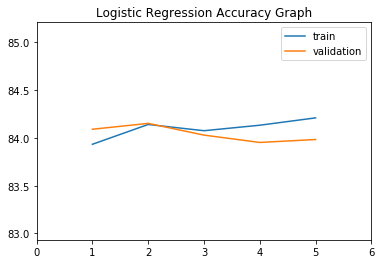

In [35]:
# Train and Evaluate the Model
main()

In [36]:
# Test our Logistic Regression Model on the test set (which is data the algorithm hasn't seen).

# To load a saved model use the warm_start_from parameter when creating an estimator. 
# This allows you to load a pre-trained model 
model = tf.estimator.LinearClassifier(model_dir=model_dirs["logistic"],
                                      feature_columns=build_logistic_model_columns(),
                                      warm_start_from=model_dirs['logistic'])

print("Logistic Regression Results on Unseen Data\n")
test_results = model.evaluate(input_fn=predict_input_fn)
print(test_results, "\n\n")

print("Logistic Regression Predictions\n")
i = 1
for prediction in model.predict(input_fn=predict_input_fn, predict_keys="classes"):  
    print(i, " : ", prediction["classes"])
    i = i + 1

Logistic Regression Results on Unseen Data

Parsing ./data/test/test_dataframe.csv
{'accuracy': 0.81174374, 'accuracy_baseline': 1.0, 'auc': 1.0, 'auc_precision_recall': 0.0, 'average_loss': 0.38104627, 'label/mean': 0.0, 'loss': 15.205427, 'prediction/mean': 0.23812443, 'global_step': 3260} 


Logistic Regression Predictions

Parsing ./data/test/test_dataframe.csv
1  :  [b'0']
2  :  [b'0']
3  :  [b'0']
4  :  [b'0']
5  :  [b'0']
6  :  [b'0']
7  :  [b'0']
8  :  [b'1']
9  :  [b'0']
10  :  [b'0']
11  :  [b'0']
12  :  [b'1']
13  :  [b'0']
14  :  [b'0']
15  :  [b'0']
16  :  [b'1']
17  :  [b'0']
18  :  [b'0']
19  :  [b'0']
20  :  [b'1']
21  :  [b'1']
22  :  [b'0']
23  :  [b'0']
24  :  [b'0']
25  :  [b'1']
26  :  [b'0']
27  :  [b'0']
28  :  [b'0']
29  :  [b'0']
30  :  [b'0']
31  :  [b'1']
32  :  [b'0']
33  :  [b'0']
34  :  [b'0']
35  :  [b'0']
36  :  [b'0']
37  :  [b'1']
38  :  [b'0']
39  :  [b'0']
40  :  [b'0']
41  :  [b'1']
42  :  [b'1']
43  :  [b'0']
44  :  [b'0']
45  :  [b'0']
46  :  [b'0

1015  :  [b'0']
1016  :  [b'1']
1017  :  [b'1']
1018  :  [b'0']
1019  :  [b'0']
1020  :  [b'1']
1021  :  [b'1']
1022  :  [b'0']
1023  :  [b'0']
1024  :  [b'0']
1025  :  [b'0']
1026  :  [b'1']
1027  :  [b'0']
1028  :  [b'0']
1029  :  [b'0']
1030  :  [b'0']
1031  :  [b'0']
1032  :  [b'0']
1033  :  [b'0']
1034  :  [b'0']
1035  :  [b'0']
1036  :  [b'0']
1037  :  [b'0']
1038  :  [b'0']
1039  :  [b'0']
1040  :  [b'0']
1041  :  [b'1']
1042  :  [b'1']
1043  :  [b'0']
1044  :  [b'0']
1045  :  [b'0']
1046  :  [b'1']
1047  :  [b'0']
1048  :  [b'0']
1049  :  [b'0']
1050  :  [b'0']
1051  :  [b'1']
1052  :  [b'0']
1053  :  [b'1']
1054  :  [b'0']
1055  :  [b'1']
1056  :  [b'1']
1057  :  [b'0']
1058  :  [b'0']
1059  :  [b'0']
1060  :  [b'0']
1061  :  [b'0']
1062  :  [b'0']
1063  :  [b'0']
1064  :  [b'0']
1065  :  [b'0']
1066  :  [b'0']
1067  :  [b'1']
1068  :  [b'0']
1069  :  [b'1']
1070  :  [b'1']
1071  :  [b'0']
1072  :  [b'0']
1073  :  [b'0']
1074  :  [b'0']
1075  :  [b'1']
1076  :  [b'1']
1077  : 

1707  :  [b'1']
1708  :  [b'0']
1709  :  [b'1']
1710  :  [b'0']
1711  :  [b'0']
1712  :  [b'0']
1713  :  [b'1']
1714  :  [b'1']
1715  :  [b'0']
1716  :  [b'0']
1717  :  [b'0']
1718  :  [b'0']
1719  :  [b'0']
1720  :  [b'0']
1721  :  [b'1']
1722  :  [b'0']
1723  :  [b'0']
1724  :  [b'0']
1725  :  [b'0']
1726  :  [b'0']
1727  :  [b'1']
1728  :  [b'0']
1729  :  [b'1']
1730  :  [b'0']
1731  :  [b'0']
1732  :  [b'0']
1733  :  [b'0']
1734  :  [b'0']
1735  :  [b'0']
1736  :  [b'0']
1737  :  [b'0']
1738  :  [b'0']
1739  :  [b'0']
1740  :  [b'0']
1741  :  [b'0']
1742  :  [b'0']
1743  :  [b'0']
1744  :  [b'0']
1745  :  [b'0']
1746  :  [b'1']
1747  :  [b'0']
1748  :  [b'0']
1749  :  [b'0']
1750  :  [b'0']
1751  :  [b'0']
1752  :  [b'0']
1753  :  [b'0']
1754  :  [b'0']
1755  :  [b'0']
1756  :  [b'0']
1757  :  [b'0']
1758  :  [b'0']
1759  :  [b'1']
1760  :  [b'1']
1761  :  [b'0']
1762  :  [b'1']
1763  :  [b'0']
1764  :  [b'0']
1765  :  [b'0']
1766  :  [b'1']
1767  :  [b'0']
1768  :  [b'1']
1769  : 

2366  :  [b'0']
2367  :  [b'1']
2368  :  [b'0']
2369  :  [b'0']
2370  :  [b'0']
2371  :  [b'0']
2372  :  [b'0']
2373  :  [b'0']
2374  :  [b'0']
2375  :  [b'0']
2376  :  [b'0']
2377  :  [b'0']
2378  :  [b'0']
2379  :  [b'1']
2380  :  [b'0']
2381  :  [b'0']
2382  :  [b'0']
2383  :  [b'0']
2384  :  [b'0']
2385  :  [b'0']
2386  :  [b'0']
2387  :  [b'0']
2388  :  [b'1']
2389  :  [b'0']
2390  :  [b'0']
2391  :  [b'1']
2392  :  [b'1']
2393  :  [b'0']
2394  :  [b'0']
2395  :  [b'0']
2396  :  [b'1']
2397  :  [b'0']
2398  :  [b'0']
2399  :  [b'0']
2400  :  [b'0']
2401  :  [b'0']
2402  :  [b'0']
2403  :  [b'0']
2404  :  [b'0']
2405  :  [b'1']
2406  :  [b'0']
2407  :  [b'0']
2408  :  [b'1']
2409  :  [b'0']
2410  :  [b'1']
2411  :  [b'0']
2412  :  [b'0']
2413  :  [b'0']
2414  :  [b'0']
2415  :  [b'1']
2416  :  [b'0']
2417  :  [b'0']
2418  :  [b'0']
2419  :  [b'0']
2420  :  [b'1']
2421  :  [b'0']
2422  :  [b'0']
2423  :  [b'0']
2424  :  [b'1']
2425  :  [b'1']
2426  :  [b'1']
2427  :  [b'0']
2428  : 

3038  :  [b'0']
3039  :  [b'0']
3040  :  [b'0']
3041  :  [b'1']
3042  :  [b'0']
3043  :  [b'0']
3044  :  [b'0']
3045  :  [b'0']
3046  :  [b'1']
3047  :  [b'0']
3048  :  [b'0']
3049  :  [b'1']
3050  :  [b'0']
3051  :  [b'0']
3052  :  [b'0']
3053  :  [b'0']
3054  :  [b'0']
3055  :  [b'0']
3056  :  [b'1']
3057  :  [b'1']
3058  :  [b'0']
3059  :  [b'0']
3060  :  [b'0']
3061  :  [b'0']
3062  :  [b'1']
3063  :  [b'0']
3064  :  [b'0']
3065  :  [b'0']
3066  :  [b'0']
3067  :  [b'0']
3068  :  [b'0']
3069  :  [b'0']
3070  :  [b'0']
3071  :  [b'0']
3072  :  [b'0']
3073  :  [b'0']
3074  :  [b'0']
3075  :  [b'0']
3076  :  [b'0']
3077  :  [b'1']
3078  :  [b'0']
3079  :  [b'1']
3080  :  [b'0']
3081  :  [b'0']
3082  :  [b'1']
3083  :  [b'0']
3084  :  [b'0']
3085  :  [b'0']
3086  :  [b'0']
3087  :  [b'0']
3088  :  [b'0']
3089  :  [b'0']
3090  :  [b'0']
3091  :  [b'0']
3092  :  [b'0']
3093  :  [b'0']
3094  :  [b'0']
3095  :  [b'0']
3096  :  [b'0']
3097  :  [b'0']
3098  :  [b'1']
3099  :  [b'0']
3100  : 

3719  :  [b'1']
3720  :  [b'0']
3721  :  [b'0']
3722  :  [b'0']
3723  :  [b'0']
3724  :  [b'0']
3725  :  [b'0']
3726  :  [b'0']
3727  :  [b'0']
3728  :  [b'1']
3729  :  [b'0']
3730  :  [b'0']
3731  :  [b'0']
3732  :  [b'0']
3733  :  [b'0']
3734  :  [b'0']
3735  :  [b'1']
3736  :  [b'0']
3737  :  [b'1']
3738  :  [b'0']
3739  :  [b'0']
3740  :  [b'0']
3741  :  [b'0']
3742  :  [b'0']
3743  :  [b'0']
3744  :  [b'0']
3745  :  [b'0']
3746  :  [b'0']
3747  :  [b'0']
3748  :  [b'0']
3749  :  [b'1']
3750  :  [b'0']
3751  :  [b'0']
3752  :  [b'0']
3753  :  [b'0']
3754  :  [b'0']
3755  :  [b'1']
3756  :  [b'0']
3757  :  [b'0']
3758  :  [b'0']
3759  :  [b'1']
3760  :  [b'1']
3761  :  [b'0']
3762  :  [b'0']
3763  :  [b'0']
3764  :  [b'1']
3765  :  [b'0']
3766  :  [b'0']
3767  :  [b'1']
3768  :  [b'1']
3769  :  [b'0']
3770  :  [b'0']
3771  :  [b'0']
3772  :  [b'0']
3773  :  [b'0']
3774  :  [b'0']
3775  :  [b'0']
3776  :  [b'0']
3777  :  [b'0']
3778  :  [b'0']
3779  :  [b'0']
3780  :  [b'1']
3781  : 

4355  :  [b'0']
4356  :  [b'0']
4357  :  [b'0']
4358  :  [b'0']
4359  :  [b'0']
4360  :  [b'0']
4361  :  [b'1']
4362  :  [b'0']
4363  :  [b'0']
4364  :  [b'0']
4365  :  [b'0']
4366  :  [b'0']
4367  :  [b'0']
4368  :  [b'0']
4369  :  [b'0']
4370  :  [b'0']
4371  :  [b'0']
4372  :  [b'1']
4373  :  [b'0']
4374  :  [b'0']
4375  :  [b'0']
4376  :  [b'0']
4377  :  [b'0']
4378  :  [b'1']
4379  :  [b'0']
4380  :  [b'1']
4381  :  [b'1']
4382  :  [b'0']
4383  :  [b'1']
4384  :  [b'0']
4385  :  [b'0']
4386  :  [b'1']
4387  :  [b'0']
4388  :  [b'0']
4389  :  [b'0']
4390  :  [b'0']
4391  :  [b'0']
4392  :  [b'0']
4393  :  [b'0']
4394  :  [b'0']
4395  :  [b'0']
4396  :  [b'0']
4397  :  [b'0']
4398  :  [b'0']
4399  :  [b'0']
4400  :  [b'0']
4401  :  [b'0']
4402  :  [b'0']
4403  :  [b'0']
4404  :  [b'0']
4405  :  [b'0']
4406  :  [b'0']
4407  :  [b'1']
4408  :  [b'0']
4409  :  [b'0']
4410  :  [b'0']
4411  :  [b'1']
4412  :  [b'0']
4413  :  [b'0']
4414  :  [b'0']
4415  :  [b'0']
4416  :  [b'0']
4417  : 

5048  :  [b'0']
5049  :  [b'0']
5050  :  [b'0']
5051  :  [b'0']
5052  :  [b'1']
5053  :  [b'0']
5054  :  [b'0']
5055  :  [b'1']
5056  :  [b'1']
5057  :  [b'0']
5058  :  [b'1']
5059  :  [b'0']
5060  :  [b'0']
5061  :  [b'1']
5062  :  [b'0']
5063  :  [b'0']
5064  :  [b'0']
5065  :  [b'0']
5066  :  [b'0']
5067  :  [b'0']
5068  :  [b'0']
5069  :  [b'1']
5070  :  [b'1']
5071  :  [b'1']
5072  :  [b'0']
5073  :  [b'0']
5074  :  [b'0']
5075  :  [b'0']
5076  :  [b'0']
5077  :  [b'0']
5078  :  [b'0']
5079  :  [b'0']
5080  :  [b'0']
5081  :  [b'0']
5082  :  [b'1']
5083  :  [b'1']
5084  :  [b'0']
5085  :  [b'0']
5086  :  [b'0']
5087  :  [b'0']
5088  :  [b'0']
5089  :  [b'0']
5090  :  [b'1']
5091  :  [b'1']
5092  :  [b'0']
5093  :  [b'0']
5094  :  [b'1']
5095  :  [b'0']
5096  :  [b'1']
5097  :  [b'0']
5098  :  [b'1']
5099  :  [b'0']
5100  :  [b'0']
5101  :  [b'0']
5102  :  [b'0']
5103  :  [b'0']
5104  :  [b'0']
5105  :  [b'0']
5106  :  [b'0']
5107  :  [b'0']
5108  :  [b'0']
5109  :  [b'0']
5110  : 

5628  :  [b'1']
5629  :  [b'0']
5630  :  [b'0']
5631  :  [b'0']
5632  :  [b'0']
5633  :  [b'0']
5634  :  [b'0']
5635  :  [b'0']
5636  :  [b'0']
5637  :  [b'0']
5638  :  [b'0']
5639  :  [b'0']
5640  :  [b'0']
5641  :  [b'0']
5642  :  [b'0']
5643  :  [b'0']
5644  :  [b'0']
5645  :  [b'1']
5646  :  [b'0']
5647  :  [b'0']
5648  :  [b'0']
5649  :  [b'0']
5650  :  [b'0']
5651  :  [b'0']
5652  :  [b'0']
5653  :  [b'0']
5654  :  [b'0']
5655  :  [b'0']
5656  :  [b'0']
5657  :  [b'0']
5658  :  [b'0']
5659  :  [b'0']
5660  :  [b'1']
5661  :  [b'0']
5662  :  [b'0']
5663  :  [b'0']
5664  :  [b'1']
5665  :  [b'1']
5666  :  [b'0']
5667  :  [b'0']
5668  :  [b'1']
5669  :  [b'0']
5670  :  [b'1']
5671  :  [b'0']
5672  :  [b'0']
5673  :  [b'0']
5674  :  [b'0']
5675  :  [b'1']
5676  :  [b'0']
5677  :  [b'0']
5678  :  [b'0']
5679  :  [b'0']
5680  :  [b'0']
5681  :  [b'1']
5682  :  [b'0']
5683  :  [b'0']
5684  :  [b'0']
5685  :  [b'0']
5686  :  [b'0']
5687  :  [b'0']
5688  :  [b'0']
5689  :  [b'0']
5690  : 

6288  :  [b'1']
6289  :  [b'0']
6290  :  [b'1']
6291  :  [b'0']
6292  :  [b'1']
6293  :  [b'0']
6294  :  [b'0']
6295  :  [b'0']
6296  :  [b'1']
6297  :  [b'0']
6298  :  [b'0']
6299  :  [b'0']
6300  :  [b'0']
6301  :  [b'0']
6302  :  [b'1']
6303  :  [b'0']
6304  :  [b'0']
6305  :  [b'0']
6306  :  [b'0']
6307  :  [b'0']
6308  :  [b'0']
6309  :  [b'0']
6310  :  [b'0']
6311  :  [b'0']
6312  :  [b'1']
6313  :  [b'0']
6314  :  [b'0']
6315  :  [b'0']
6316  :  [b'0']
6317  :  [b'0']
6318  :  [b'1']
6319  :  [b'0']
6320  :  [b'0']
6321  :  [b'0']
6322  :  [b'0']
6323  :  [b'1']
6324  :  [b'0']
6325  :  [b'1']
6326  :  [b'0']
6327  :  [b'0']
6328  :  [b'1']
6329  :  [b'1']
6330  :  [b'1']
6331  :  [b'0']
6332  :  [b'0']
6333  :  [b'0']
6334  :  [b'0']
6335  :  [b'0']
6336  :  [b'0']
6337  :  [b'1']
6338  :  [b'0']
6339  :  [b'1']
6340  :  [b'0']
6341  :  [b'0']
6342  :  [b'0']
6343  :  [b'1']
6344  :  [b'1']
6345  :  [b'1']
6346  :  [b'0']
6347  :  [b'0']
6348  :  [b'0']
6349  :  [b'0']
6350  : 

6859  :  [b'1']
6860  :  [b'0']
6861  :  [b'0']
6862  :  [b'1']
6863  :  [b'1']
6864  :  [b'0']
6865  :  [b'1']
6866  :  [b'0']
6867  :  [b'0']
6868  :  [b'0']
6869  :  [b'0']
6870  :  [b'0']
6871  :  [b'0']
6872  :  [b'0']
6873  :  [b'0']
6874  :  [b'0']
6875  :  [b'0']
6876  :  [b'0']
6877  :  [b'0']
6878  :  [b'1']
6879  :  [b'0']
6880  :  [b'0']
6881  :  [b'0']
6882  :  [b'0']
6883  :  [b'0']
6884  :  [b'0']
6885  :  [b'0']
6886  :  [b'0']
6887  :  [b'0']
6888  :  [b'0']
6889  :  [b'0']
6890  :  [b'1']
6891  :  [b'0']
6892  :  [b'0']
6893  :  [b'0']
6894  :  [b'0']
6895  :  [b'0']
6896  :  [b'0']
6897  :  [b'0']
6898  :  [b'0']
6899  :  [b'0']
6900  :  [b'0']
6901  :  [b'0']
6902  :  [b'0']
6903  :  [b'0']
6904  :  [b'0']
6905  :  [b'0']
6906  :  [b'0']
6907  :  [b'1']
6908  :  [b'1']
6909  :  [b'0']
6910  :  [b'1']
6911  :  [b'0']
6912  :  [b'0']
6913  :  [b'0']
6914  :  [b'0']
6915  :  [b'0']
6916  :  [b'0']
6917  :  [b'1']
6918  :  [b'0']
6919  :  [b'1']
6920  :  [b'0']
6921  : 

7550  :  [b'0']
7551  :  [b'1']
7552  :  [b'1']
7553  :  [b'1']
7554  :  [b'0']
7555  :  [b'0']
7556  :  [b'0']
7557  :  [b'0']
7558  :  [b'0']
7559  :  [b'0']
7560  :  [b'0']
7561  :  [b'0']
7562  :  [b'0']
7563  :  [b'1']
7564  :  [b'0']
7565  :  [b'0']
7566  :  [b'1']
7567  :  [b'0']
7568  :  [b'1']
7569  :  [b'0']
7570  :  [b'0']
7571  :  [b'0']
7572  :  [b'0']
7573  :  [b'0']
7574  :  [b'0']
7575  :  [b'0']
7576  :  [b'0']
7577  :  [b'0']
7578  :  [b'1']
7579  :  [b'1']
7580  :  [b'0']
7581  :  [b'0']
7582  :  [b'0']
7583  :  [b'0']
7584  :  [b'0']
7585  :  [b'0']
7586  :  [b'0']
7587  :  [b'0']
7588  :  [b'0']
7589  :  [b'0']
7590  :  [b'0']
7591  :  [b'0']
7592  :  [b'1']
7593  :  [b'0']
7594  :  [b'0']
7595  :  [b'0']
7596  :  [b'0']
7597  :  [b'0']
7598  :  [b'1']
7599  :  [b'0']
7600  :  [b'0']
7601  :  [b'0']
7602  :  [b'1']
7603  :  [b'0']
7604  :  [b'1']
7605  :  [b'0']
7606  :  [b'1']
7607  :  [b'1']
7608  :  [b'0']
7609  :  [b'0']
7610  :  [b'1']
7611  :  [b'0']
7612  : 

8180  :  [b'0']
8181  :  [b'0']
8182  :  [b'0']
8183  :  [b'1']
8184  :  [b'0']
8185  :  [b'1']
8186  :  [b'0']
8187  :  [b'0']
8188  :  [b'0']
8189  :  [b'0']
8190  :  [b'0']
8191  :  [b'0']
8192  :  [b'0']
8193  :  [b'0']
8194  :  [b'0']
8195  :  [b'0']
8196  :  [b'0']
8197  :  [b'0']
8198  :  [b'0']
8199  :  [b'0']
8200  :  [b'0']
8201  :  [b'0']
8202  :  [b'1']
8203  :  [b'0']
8204  :  [b'0']
8205  :  [b'0']
8206  :  [b'0']
8207  :  [b'0']
8208  :  [b'0']
8209  :  [b'0']
8210  :  [b'1']
8211  :  [b'0']
8212  :  [b'0']
8213  :  [b'0']
8214  :  [b'0']
8215  :  [b'1']
8216  :  [b'1']
8217  :  [b'0']
8218  :  [b'0']
8219  :  [b'0']
8220  :  [b'0']
8221  :  [b'0']
8222  :  [b'1']
8223  :  [b'0']
8224  :  [b'0']
8225  :  [b'0']
8226  :  [b'1']
8227  :  [b'0']
8228  :  [b'0']
8229  :  [b'0']
8230  :  [b'0']
8231  :  [b'0']
8232  :  [b'0']
8233  :  [b'0']
8234  :  [b'1']
8235  :  [b'0']
8236  :  [b'0']
8237  :  [b'1']
8238  :  [b'0']
8239  :  [b'0']
8240  :  [b'0']
8241  :  [b'0']
8242  : 

8871  :  [b'0']
8872  :  [b'1']
8873  :  [b'0']
8874  :  [b'0']
8875  :  [b'0']
8876  :  [b'0']
8877  :  [b'1']
8878  :  [b'1']
8879  :  [b'0']
8880  :  [b'0']
8881  :  [b'0']
8882  :  [b'0']
8883  :  [b'0']
8884  :  [b'0']
8885  :  [b'0']
8886  :  [b'1']
8887  :  [b'0']
8888  :  [b'0']
8889  :  [b'0']
8890  :  [b'0']
8891  :  [b'0']
8892  :  [b'0']
8893  :  [b'0']
8894  :  [b'0']
8895  :  [b'0']
8896  :  [b'0']
8897  :  [b'0']
8898  :  [b'0']
8899  :  [b'0']
8900  :  [b'1']
8901  :  [b'0']
8902  :  [b'0']
8903  :  [b'0']
8904  :  [b'0']
8905  :  [b'0']
8906  :  [b'0']
8907  :  [b'0']
8908  :  [b'0']
8909  :  [b'1']
8910  :  [b'0']
8911  :  [b'0']
8912  :  [b'0']
8913  :  [b'0']
8914  :  [b'1']
8915  :  [b'0']
8916  :  [b'1']
8917  :  [b'0']
8918  :  [b'0']
8919  :  [b'1']
8920  :  [b'0']
8921  :  [b'0']
8922  :  [b'0']
8923  :  [b'0']
8924  :  [b'1']
8925  :  [b'1']
8926  :  [b'0']
8927  :  [b'1']
8928  :  [b'0']
8929  :  [b'0']
8930  :  [b'0']
8931  :  [b'0']
8932  :  [b'0']
8933  : 

9523  :  [b'0']
9524  :  [b'0']
9525  :  [b'0']
9526  :  [b'1']
9527  :  [b'0']
9528  :  [b'0']
9529  :  [b'0']
9530  :  [b'0']
9531  :  [b'0']
9532  :  [b'0']
9533  :  [b'0']
9534  :  [b'0']
9535  :  [b'0']
9536  :  [b'0']
9537  :  [b'0']
9538  :  [b'0']
9539  :  [b'0']
9540  :  [b'0']
9541  :  [b'1']
9542  :  [b'0']
9543  :  [b'0']
9544  :  [b'0']
9545  :  [b'0']
9546  :  [b'0']
9547  :  [b'1']
9548  :  [b'0']
9549  :  [b'0']
9550  :  [b'0']
9551  :  [b'0']
9552  :  [b'0']
9553  :  [b'0']
9554  :  [b'0']
9555  :  [b'0']
9556  :  [b'0']
9557  :  [b'0']
9558  :  [b'0']
9559  :  [b'0']
9560  :  [b'0']
9561  :  [b'0']
9562  :  [b'0']
9563  :  [b'1']
9564  :  [b'0']
9565  :  [b'1']
9566  :  [b'0']
9567  :  [b'1']
9568  :  [b'0']
9569  :  [b'1']
9570  :  [b'0']
9571  :  [b'1']
9572  :  [b'0']
9573  :  [b'1']
9574  :  [b'0']
9575  :  [b'0']
9576  :  [b'0']
9577  :  [b'1']
9578  :  [b'1']
9579  :  [b'0']
9580  :  [b'0']
9581  :  [b'0']
9582  :  [b'0']
9583  :  [b'0']
9584  :  [b'0']
9585  : 

10217  :  [b'0']
10218  :  [b'0']
10219  :  [b'0']
10220  :  [b'0']
10221  :  [b'0']
10222  :  [b'0']
10223  :  [b'0']
10224  :  [b'0']
10225  :  [b'0']
10226  :  [b'0']
10227  :  [b'0']
10228  :  [b'0']
10229  :  [b'0']
10230  :  [b'0']
10231  :  [b'0']
10232  :  [b'0']
10233  :  [b'0']
10234  :  [b'0']
10235  :  [b'0']
10236  :  [b'1']
10237  :  [b'0']
10238  :  [b'0']
10239  :  [b'0']
10240  :  [b'0']
10241  :  [b'0']
10242  :  [b'0']
10243  :  [b'0']
10244  :  [b'1']
10245  :  [b'0']
10246  :  [b'0']
10247  :  [b'0']
10248  :  [b'0']
10249  :  [b'0']
10250  :  [b'0']
10251  :  [b'0']
10252  :  [b'0']
10253  :  [b'0']
10254  :  [b'0']
10255  :  [b'0']
10256  :  [b'0']
10257  :  [b'0']
10258  :  [b'0']
10259  :  [b'1']
10260  :  [b'0']
10261  :  [b'0']
10262  :  [b'0']
10263  :  [b'0']
10264  :  [b'0']
10265  :  [b'0']
10266  :  [b'0']
10267  :  [b'0']
10268  :  [b'0']
10269  :  [b'0']
10270  :  [b'0']
10271  :  [b'0']
10272  :  [b'1']
10273  :  [b'0']
10274  :  [b'1']
10275  :  [b'0

10875  :  [b'0']
10876  :  [b'0']
10877  :  [b'0']
10878  :  [b'0']
10879  :  [b'1']
10880  :  [b'0']
10881  :  [b'1']
10882  :  [b'0']
10883  :  [b'0']
10884  :  [b'0']
10885  :  [b'0']
10886  :  [b'0']
10887  :  [b'0']
10888  :  [b'0']
10889  :  [b'0']
10890  :  [b'0']
10891  :  [b'0']
10892  :  [b'0']
10893  :  [b'0']
10894  :  [b'1']
10895  :  [b'0']
10896  :  [b'0']
10897  :  [b'0']
10898  :  [b'0']
10899  :  [b'1']
10900  :  [b'0']
10901  :  [b'0']
10902  :  [b'0']
10903  :  [b'0']
10904  :  [b'1']
10905  :  [b'1']
10906  :  [b'0']
10907  :  [b'1']
10908  :  [b'1']
10909  :  [b'1']
10910  :  [b'0']
10911  :  [b'0']
10912  :  [b'0']
10913  :  [b'0']
10914  :  [b'0']
10915  :  [b'0']
10916  :  [b'0']
10917  :  [b'0']
10918  :  [b'1']
10919  :  [b'0']
10920  :  [b'0']
10921  :  [b'1']
10922  :  [b'0']
10923  :  [b'0']
10924  :  [b'0']
10925  :  [b'0']
10926  :  [b'0']
10927  :  [b'0']
10928  :  [b'0']
10929  :  [b'1']
10930  :  [b'0']
10931  :  [b'0']
10932  :  [b'0']
10933  :  [b'1

11537  :  [b'1']
11538  :  [b'0']
11539  :  [b'0']
11540  :  [b'0']
11541  :  [b'1']
11542  :  [b'1']
11543  :  [b'0']
11544  :  [b'0']
11545  :  [b'0']
11546  :  [b'0']
11547  :  [b'0']
11548  :  [b'0']
11549  :  [b'0']
11550  :  [b'1']
11551  :  [b'0']
11552  :  [b'0']
11553  :  [b'1']
11554  :  [b'0']
11555  :  [b'1']
11556  :  [b'0']
11557  :  [b'0']
11558  :  [b'0']
11559  :  [b'0']
11560  :  [b'0']
11561  :  [b'0']
11562  :  [b'0']
11563  :  [b'1']
11564  :  [b'0']
11565  :  [b'0']
11566  :  [b'0']
11567  :  [b'0']
11568  :  [b'0']
11569  :  [b'1']
11570  :  [b'0']
11571  :  [b'0']
11572  :  [b'0']
11573  :  [b'0']
11574  :  [b'1']
11575  :  [b'0']
11576  :  [b'0']
11577  :  [b'0']
11578  :  [b'1']
11579  :  [b'0']
11580  :  [b'0']
11581  :  [b'0']
11582  :  [b'0']
11583  :  [b'0']
11584  :  [b'1']
11585  :  [b'0']
11586  :  [b'0']
11587  :  [b'1']
11588  :  [b'0']
11589  :  [b'1']
11590  :  [b'1']
11591  :  [b'1']
11592  :  [b'0']
11593  :  [b'0']
11594  :  [b'1']
11595  :  [b'0

12212  :  [b'1']
12213  :  [b'0']
12214  :  [b'0']
12215  :  [b'0']
12216  :  [b'0']
12217  :  [b'0']
12218  :  [b'0']
12219  :  [b'0']
12220  :  [b'0']
12221  :  [b'0']
12222  :  [b'0']
12223  :  [b'1']
12224  :  [b'0']
12225  :  [b'1']
12226  :  [b'0']
12227  :  [b'0']
12228  :  [b'0']
12229  :  [b'0']
12230  :  [b'0']
12231  :  [b'0']
12232  :  [b'0']
12233  :  [b'0']
12234  :  [b'0']
12235  :  [b'0']
12236  :  [b'0']
12237  :  [b'1']
12238  :  [b'0']
12239  :  [b'0']
12240  :  [b'1']
12241  :  [b'0']
12242  :  [b'0']
12243  :  [b'0']
12244  :  [b'0']
12245  :  [b'0']
12246  :  [b'0']
12247  :  [b'0']
12248  :  [b'1']
12249  :  [b'0']
12250  :  [b'0']
12251  :  [b'0']
12252  :  [b'1']
12253  :  [b'0']
12254  :  [b'0']
12255  :  [b'0']
12256  :  [b'1']
12257  :  [b'0']
12258  :  [b'0']
12259  :  [b'0']
12260  :  [b'0']
12261  :  [b'1']
12262  :  [b'1']
12263  :  [b'0']
12264  :  [b'0']
12265  :  [b'0']
12266  :  [b'0']
12267  :  [b'0']
12268  :  [b'1']
12269  :  [b'1']
12270  :  [b'0

12885  :  [b'0']
12886  :  [b'0']
12887  :  [b'0']
12888  :  [b'0']
12889  :  [b'0']
12890  :  [b'0']
12891  :  [b'0']
12892  :  [b'0']
12893  :  [b'0']
12894  :  [b'0']
12895  :  [b'0']
12896  :  [b'0']
12897  :  [b'0']
12898  :  [b'1']
12899  :  [b'0']
12900  :  [b'1']
12901  :  [b'0']
12902  :  [b'1']
12903  :  [b'0']
12904  :  [b'0']
12905  :  [b'0']
12906  :  [b'0']
12907  :  [b'0']
12908  :  [b'0']
12909  :  [b'0']
12910  :  [b'0']
12911  :  [b'0']
12912  :  [b'0']
12913  :  [b'0']
12914  :  [b'0']
12915  :  [b'0']
12916  :  [b'0']
12917  :  [b'0']
12918  :  [b'0']
12919  :  [b'0']
12920  :  [b'0']
12921  :  [b'0']
12922  :  [b'0']
12923  :  [b'0']
12924  :  [b'1']
12925  :  [b'1']
12926  :  [b'0']
12927  :  [b'0']
12928  :  [b'0']
12929  :  [b'0']
12930  :  [b'0']
12931  :  [b'1']
12932  :  [b'0']
12933  :  [b'0']
12934  :  [b'0']
12935  :  [b'0']
12936  :  [b'0']
12937  :  [b'0']
12938  :  [b'1']
12939  :  [b'0']
12940  :  [b'0']
12941  :  [b'1']
12942  :  [b'0']
12943  :  [b'0

13536  :  [b'0']
13537  :  [b'0']
13538  :  [b'0']
13539  :  [b'0']
13540  :  [b'0']
13541  :  [b'1']
13542  :  [b'1']
13543  :  [b'0']
13544  :  [b'0']
13545  :  [b'1']
13546  :  [b'1']
13547  :  [b'0']
13548  :  [b'0']
13549  :  [b'0']
13550  :  [b'0']
13551  :  [b'0']
13552  :  [b'0']
13553  :  [b'0']
13554  :  [b'0']
13555  :  [b'1']
13556  :  [b'1']
13557  :  [b'0']
13558  :  [b'0']
13559  :  [b'0']
13560  :  [b'1']
13561  :  [b'0']
13562  :  [b'0']
13563  :  [b'0']
13564  :  [b'0']
13565  :  [b'0']
13566  :  [b'0']
13567  :  [b'0']
13568  :  [b'0']
13569  :  [b'0']
13570  :  [b'1']
13571  :  [b'0']
13572  :  [b'0']
13573  :  [b'0']
13574  :  [b'0']
13575  :  [b'1']
13576  :  [b'0']
13577  :  [b'0']
13578  :  [b'0']
13579  :  [b'0']
13580  :  [b'1']
13581  :  [b'0']
13582  :  [b'0']
13583  :  [b'0']
13584  :  [b'0']
13585  :  [b'0']
13586  :  [b'1']
13587  :  [b'0']
13588  :  [b'0']
13589  :  [b'0']
13590  :  [b'1']
13591  :  [b'0']
13592  :  [b'0']
13593  :  [b'0']
13594  :  [b'0

14207  :  [b'0']
14208  :  [b'0']
14209  :  [b'0']
14210  :  [b'1']
14211  :  [b'1']
14212  :  [b'0']
14213  :  [b'0']
14214  :  [b'0']
14215  :  [b'0']
14216  :  [b'0']
14217  :  [b'0']
14218  :  [b'0']
14219  :  [b'0']
14220  :  [b'0']
14221  :  [b'0']
14222  :  [b'1']
14223  :  [b'0']
14224  :  [b'1']
14225  :  [b'1']
14226  :  [b'1']
14227  :  [b'0']
14228  :  [b'0']
14229  :  [b'1']
14230  :  [b'1']
14231  :  [b'0']
14232  :  [b'0']
14233  :  [b'0']
14234  :  [b'0']
14235  :  [b'1']
14236  :  [b'0']
14237  :  [b'1']
14238  :  [b'0']
14239  :  [b'0']
14240  :  [b'0']
14241  :  [b'0']
14242  :  [b'0']
14243  :  [b'0']
14244  :  [b'0']
14245  :  [b'0']
14246  :  [b'0']
14247  :  [b'0']
14248  :  [b'0']
14249  :  [b'0']
14250  :  [b'0']
14251  :  [b'0']
14252  :  [b'1']
14253  :  [b'1']
14254  :  [b'0']
14255  :  [b'0']
14256  :  [b'1']
14257  :  [b'0']
14258  :  [b'0']
14259  :  [b'1']
14260  :  [b'1']
14261  :  [b'0']
14262  :  [b'0']
14263  :  [b'0']
14264  :  [b'0']
14265  :  [b'0

14873  :  [b'0']
14874  :  [b'0']
14875  :  [b'0']
14876  :  [b'0']
14877  :  [b'1']
14878  :  [b'0']
14879  :  [b'0']
14880  :  [b'0']
14881  :  [b'0']
14882  :  [b'0']
14883  :  [b'0']
14884  :  [b'0']
14885  :  [b'0']
14886  :  [b'0']
14887  :  [b'0']
14888  :  [b'0']
14889  :  [b'0']
14890  :  [b'0']
14891  :  [b'1']
14892  :  [b'1']
14893  :  [b'0']
14894  :  [b'0']
14895  :  [b'0']
14896  :  [b'0']
14897  :  [b'0']
14898  :  [b'1']
14899  :  [b'0']
14900  :  [b'1']
14901  :  [b'0']
14902  :  [b'0']
14903  :  [b'0']
14904  :  [b'0']
14905  :  [b'0']
14906  :  [b'0']
14907  :  [b'0']
14908  :  [b'1']
14909  :  [b'0']
14910  :  [b'0']
14911  :  [b'0']
14912  :  [b'0']
14913  :  [b'0']
14914  :  [b'0']
14915  :  [b'0']
14916  :  [b'0']
14917  :  [b'0']
14918  :  [b'0']
14919  :  [b'0']
14920  :  [b'0']
14921  :  [b'1']
14922  :  [b'0']
14923  :  [b'0']
14924  :  [b'0']
14925  :  [b'0']
14926  :  [b'0']
14927  :  [b'0']
14928  :  [b'0']
14929  :  [b'0']
14930  :  [b'0']
14931  :  [b'1

15538  :  [b'0']
15539  :  [b'0']
15540  :  [b'1']
15541  :  [b'0']
15542  :  [b'0']
15543  :  [b'0']
15544  :  [b'0']
15545  :  [b'0']
15546  :  [b'0']
15547  :  [b'1']
15548  :  [b'0']
15549  :  [b'0']
15550  :  [b'0']
15551  :  [b'0']
15552  :  [b'0']
15553  :  [b'0']
15554  :  [b'0']
15555  :  [b'0']
15556  :  [b'0']
15557  :  [b'0']
15558  :  [b'0']
15559  :  [b'1']
15560  :  [b'1']
15561  :  [b'0']
15562  :  [b'1']
15563  :  [b'0']
15564  :  [b'0']
15565  :  [b'0']
15566  :  [b'0']
15567  :  [b'1']
15568  :  [b'0']
15569  :  [b'0']
15570  :  [b'1']
15571  :  [b'0']
15572  :  [b'0']
15573  :  [b'0']
15574  :  [b'0']
15575  :  [b'0']
15576  :  [b'0']
15577  :  [b'0']
15578  :  [b'0']
15579  :  [b'0']
15580  :  [b'1']
15581  :  [b'0']
15582  :  [b'0']
15583  :  [b'1']
15584  :  [b'0']
15585  :  [b'0']
15586  :  [b'1']
15587  :  [b'0']
15588  :  [b'1']
15589  :  [b'0']
15590  :  [b'0']
15591  :  [b'0']
15592  :  [b'0']
15593  :  [b'0']
15594  :  [b'0']
15595  :  [b'1']
15596  :  [b'0

16251  :  [b'1']
16252  :  [b'0']
16253  :  [b'1']
16254  :  [b'0']
16255  :  [b'1']
16256  :  [b'1']
16257  :  [b'0']
16258  :  [b'0']
16259  :  [b'1']
16260  :  [b'0']
16261  :  [b'0']
16262  :  [b'1']
16263  :  [b'0']
16264  :  [b'0']
16265  :  [b'0']
16266  :  [b'1']
16267  :  [b'0']
16268  :  [b'0']
16269  :  [b'0']
16270  :  [b'0']
16271  :  [b'0']
16272  :  [b'0']
16273  :  [b'0']
16274  :  [b'0']
16275  :  [b'0']
16276  :  [b'0']
16277  :  [b'0']
16278  :  [b'0']
16279  :  [b'1']
16280  :  [b'0']
16281  :  [b'1']


#### Neural Networks and Deep Learning 

This is where things start to get interesting. Neural networks are built off the perceptrons that we discussed earlier. Each of the perceptrons are connected to other perceptrons in a layer to the next layer in a fashion as shown in the diagram below. While the model is in training mode it uses gradient decent to propagate the error back through each of the layers proportinate to the errors that each percepron caused.  These types of algorithms are better in general for generalizing as opposed to Linear models(like above) which tend to memorize inputs to create predictions.  Both methodologies have their strengths and drawbacks.

![neural_net.png](https://www.researchgate.net/publication/39730973/figure/fig10/AS:328302012190737@1455284707711/Schematic-diagram-of-a-general-back-propagation-neural-network.png)

** *Code Reuse* **

In [37]:
# Setup TensorFlow
import tensorflow as tf # pylint: disable=g-bad-import-order
tf.logging.set_verbosity(tf.logging.WARN)

# Setup pyplot for visualizations in examples
%matplotlib inline 
import matplotlib.pyplot as plt # Plotting and visualizing the data in this lession

In [38]:
# Set Hyperparameters
train_epochs = 5 #40
epochs_between_evals = 1
batch_size = 40

# Set stop threshold if you want it to stop at a particular point
stop_threshold = None 

** *New Code* **

In [39]:
def build_deep_neural_net_model_columns():
    return [age,
            education_num,
            capital_gain,
            capital_loss,
            hours_per_week,
            
            # indicator_column takes a categorical column and converts each category into a one-hot vector (e.g. [0,1, 0... ,0])
            # where the matching category has value 1 and the rest have 0s. 
            # This column type is useful when there is a limited number of categories. 
            tf.feature_column.indicator_column(workclass),
            tf.feature_column.indicator_column(education),
            tf.feature_column.indicator_column(marital_status),
            tf.feature_column.indicator_column(relationship),
            
            # embedding_columns allows you to convert a categorical column into a 
            # representation useful for neural networks as well, but the difference from an
            # indicator column is that the categorical column can have a large number of categories. 
            tf.feature_column.embedding_column(occupation, dimension=8)]

In [40]:
def define_hidden_units():
    return [100, 75, 50, 25]

In [41]:
def build_deep_neural_net_estimator():
    run_config = tf.estimator.RunConfig()
    run_config.replace(session_config=tf.ConfigProto(device_count={'GPU': 0}))
    
    return tf.estimator.DNNClassifier(
            model_dir=model_dirs['deepNN'],
            feature_columns=build_deep_neural_net_model_columns(),
            hidden_units=define_hidden_units(),
            config=run_config)

** *Code Reuse* **

In [42]:
def input_fn(data_file, num_epochs, shuffle, batch_size):
    """Generate an input function for the Estimator."""
    assert tf.gfile.Exists(data_file), ( '%s not found.' % data_file)

    def parse_csv(value):
        print('Parsing', data_file)
        columns = tf.decode_csv(value, record_defaults=CSV_COLUMN_DEFAULTS)
        features = dict(zip(CSV_COLUMN_NAMES, columns))
        labels = features.pop('income_bracket')
        
        return features, tf.equal(labels, '>50K')

    # Extract lines from input files using the Dataset API.
    dataset = tf.data.TextLineDataset(data_file)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=NUM_EXAMPLES['train'])

    dataset = dataset.map(parse_csv, num_parallel_calls=5)
     

    # We call repeat after shuffling, rather than before, to prevent separate
    # epochs from blending together.
    dataset = dataset.repeat(num_epochs)
    dataset = dataset.batch(batch_size)
    return dataset

In [43]:
def train_input_fn():
    return input_fn(files['train']['file_name'], epochs_between_evals, True, batch_size)

def evaluate_input_fn():
    return input_fn(files['validation']['file_name'], 1, False, batch_size)

def predict_input_fn():
    return input_fn(files['test']['file_name'], 1, False, batch_size)

In [44]:
import numbers
def past_stop_threshold(stop_threshold, eval_metric):
    if stop_threshold is None:
        return False
    
    if not isinstance(stop_threshold, numbers.Number):
        raise ValueError("Threshold for checking stop conditions must be a number.")
    if not isinstance(eval_metric, numbers.Number):
        raise ValueError("Eval metric being checked against stop conditions "
                     "must be a number.")
    
    if eval_metric >= stop_threshold:
        tf.logging.info( "Stop threshold of {} was passed with metric value {}.".format(
            stop_threshold, eval_metric))
        return True

    return False

In [45]:
def plot_accuracies(title, epochs, accuracy_dicts): 
    axes = plt.gca()
    
    accuracy_lists = [accuracy_dict["accuracy"] for accuracy_dict in accuracy_dicts]
    
    y_min = min(min(accuracy_list) for accuracy_list in accuracy_lists)
    y_max = max(max(accuracy_list) for accuracy_list in accuracy_lists)
    
    axes.set_xlim(min(epochs) - 1, max(epochs) + 1)
    axes.set_ylim(y_min - 1, y_max + 1)
    
    lines = []
    for accuracy_dict in accuracy_dicts: 
        line, = axes.plot(epochs, accuracy_dict["accuracy"], label=accuracy_dict["name_for_line"])
        lines.append(line)
        
    plt.legend(handles=lines)
    
    plt.title(title)
    plt.show()

** *A few minor changes* **

In [46]:
import argparse
import os
import shutil
import sys

def main():
    # Clean up the model directory if present
    shutil.rmtree(model_dirs['deepNN'], ignore_errors=True) # Changed model directory
    model = build_deep_neural_net_estimator() # Changed from Logistic Regression 
       
        
    epochs = [] # A list for display the accuracies per epoch
    
    # Note: For our example we are only going to focus on accuracy as our indicator for performance
    train_accuracy_per_epoch = {"name_for_line": "Train", "accuracy": []}
    validation_accuracy_per_epoch = {"name_for_line": "Validation", "accuracy": []}
    
    # For the full results per epoch examine these variables
    train_results_per_epoch = [] 
    validation_results_per_epoch = []
    
    # Train and evaluate the model every `epochs_between_evals` epochs.
    for n in range(train_epochs // epochs_between_evals):
        print('Results at epoch', (n + 1) * epochs_between_evals)
        print('-' * 60)
        
        epochs.append(n + 1)
        
        model.train(input_fn=train_input_fn) 
        
        train_results = model.evaluate(input_fn=train_input_fn)
        train_results_per_epoch.append(train_results)
        train_accuracy_per_epoch["accuracy"].append(train_results['accuracy']*100)
        
        evaluation_results = model.evaluate(input_fn=evaluate_input_fn)
        validation_results_per_epoch.append(evaluation_results)
        validation_accuracy_per_epoch["accuracy"].append(evaluation_results['accuracy']*100)
        
        # Display evaluation metrics
        print('-' * 60)
        print(evaluation_results, "\n\n")
                    
        if past_stop_threshold(stop_threshold, evaluation_results['accuracy']):
            break
                  
    plot_accuracies("Deep Neural Net Accuracy Graph", 
                    epochs, 
                    [train_accuracy_per_epoch, validation_accuracy_per_epoch]) # Changed Graph Title
    
   

Results at epoch 1
------------------------------------------------------------
Parsing ./data/train/train_dataframe.csv
Parsing ./data/train/train_dataframe.csv
Parsing ./data/validation/validation_dataframe.csv
------------------------------------------------------------
{'accuracy': 0.80328625, 'accuracy_baseline': 0.7599816, 'auc': 0.8683988, 'auc_precision_recall': 0.6352598, 'average_loss': 0.380687, 'label/mean': 0.24001843, 'loss': 15.208796, 'prediction/mean': 0.19616827, 'global_step': 652} 


Results at epoch 2
------------------------------------------------------------
Parsing ./data/train/train_dataframe.csv
Parsing ./data/train/train_dataframe.csv
Parsing ./data/validation/validation_dataframe.csv
------------------------------------------------------------
{'accuracy': 0.8063575, 'accuracy_baseline': 0.7599816, 'auc': 0.8743204, 'auc_precision_recall': 0.649557, 'average_loss': 0.36443883, 'label/mean': 0.24001843, 'loss': 14.559667, 'prediction/mean': 0.22382689, 'glob

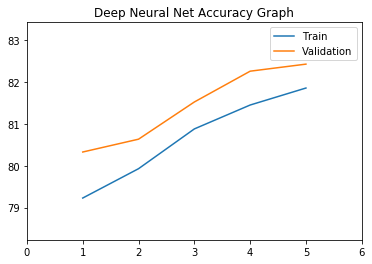

In [47]:
# Train and Evaluate the Model
main()

In [48]:
# Test our Neural Net Model on the test set (which is data the algorithm hasn't seen).

# To load a saved model use the warm_start_from parameter when creating an estimator. 
# This allows you to load a pre-trained model 
model = tf.estimator.DNNClassifier(model_dir=model_dirs["deepNN"], # Changed model directory
                                   feature_columns=build_deep_neural_net_model_columns(),
                                   hidden_units=define_hidden_units(),
                                   warm_start_from=model_dirs['deepNN']) # Changed model directory 


print("Deep Neural Net Results on Unseen Data\n")
test_results = model.evaluate(input_fn=predict_input_fn)
print(test_results, "\n\n")


print("Deep Neural Net Predictions\n")
i = 1
for prediction in model.predict(input_fn=predict_input_fn, predict_keys="classes"):  
    print(i, " : ", prediction["classes"])
    i = i + 1

Deep Neural Net Results on Unseen Data

Parsing ./data/test/test_dataframe.csv
{'accuracy': 0.7250783, 'accuracy_baseline': 1.0, 'auc': 1.0, 'auc_precision_recall': 0.0, 'average_loss': 0.37319618, 'label/mean': 0.0, 'loss': 14.892175, 'prediction/mean': 0.2545231, 'global_step': 3260} 


Deep Neural Net Predictions

Parsing ./data/test/test_dataframe.csv
1  :  [b'0']
2  :  [b'0']
3  :  [b'0']
4  :  [b'1']
5  :  [b'0']
6  :  [b'0']
7  :  [b'0']
8  :  [b'1']
9  :  [b'0']
10  :  [b'0']
11  :  [b'1']
12  :  [b'1']
13  :  [b'0']
14  :  [b'0']
15  :  [b'1']
16  :  [b'1']
17  :  [b'0']
18  :  [b'0']
19  :  [b'0']
20  :  [b'1']
21  :  [b'1']
22  :  [b'0']
23  :  [b'0']
24  :  [b'0']
25  :  [b'1']
26  :  [b'1']
27  :  [b'0']
28  :  [b'0']
29  :  [b'0']
30  :  [b'0']
31  :  [b'1']
32  :  [b'0']
33  :  [b'0']
34  :  [b'0']
35  :  [b'0']
36  :  [b'0']
37  :  [b'1']
38  :  [b'0']
39  :  [b'0']
40  :  [b'0']
41  :  [b'1']
42  :  [b'1']
43  :  [b'0']
44  :  [b'0']
45  :  [b'0']
46  :  [b'1']
47  :  

1032  :  [b'0']
1033  :  [b'0']
1034  :  [b'0']
1035  :  [b'0']
1036  :  [b'0']
1037  :  [b'0']
1038  :  [b'0']
1039  :  [b'0']
1040  :  [b'0']
1041  :  [b'1']
1042  :  [b'1']
1043  :  [b'0']
1044  :  [b'0']
1045  :  [b'0']
1046  :  [b'1']
1047  :  [b'1']
1048  :  [b'0']
1049  :  [b'0']
1050  :  [b'0']
1051  :  [b'1']
1052  :  [b'1']
1053  :  [b'1']
1054  :  [b'0']
1055  :  [b'1']
1056  :  [b'1']
1057  :  [b'0']
1058  :  [b'1']
1059  :  [b'0']
1060  :  [b'0']
1061  :  [b'0']
1062  :  [b'0']
1063  :  [b'0']
1064  :  [b'1']
1065  :  [b'0']
1066  :  [b'0']
1067  :  [b'1']
1068  :  [b'0']
1069  :  [b'1']
1070  :  [b'1']
1071  :  [b'1']
1072  :  [b'0']
1073  :  [b'0']
1074  :  [b'0']
1075  :  [b'1']
1076  :  [b'1']
1077  :  [b'0']
1078  :  [b'0']
1079  :  [b'1']
1080  :  [b'1']
1081  :  [b'0']
1082  :  [b'0']
1083  :  [b'1']
1084  :  [b'1']
1085  :  [b'0']
1086  :  [b'0']
1087  :  [b'1']
1088  :  [b'0']
1089  :  [b'0']
1090  :  [b'1']
1091  :  [b'1']
1092  :  [b'0']
1093  :  [b'0']
1094  : 

1673  :  [b'0']
1674  :  [b'1']
1675  :  [b'0']
1676  :  [b'0']
1677  :  [b'1']
1678  :  [b'0']
1679  :  [b'0']
1680  :  [b'0']
1681  :  [b'1']
1682  :  [b'0']
1683  :  [b'0']
1684  :  [b'0']
1685  :  [b'1']
1686  :  [b'0']
1687  :  [b'1']
1688  :  [b'0']
1689  :  [b'0']
1690  :  [b'1']
1691  :  [b'0']
1692  :  [b'1']
1693  :  [b'0']
1694  :  [b'0']
1695  :  [b'0']
1696  :  [b'0']
1697  :  [b'0']
1698  :  [b'0']
1699  :  [b'1']
1700  :  [b'1']
1701  :  [b'0']
1702  :  [b'0']
1703  :  [b'0']
1704  :  [b'1']
1705  :  [b'0']
1706  :  [b'1']
1707  :  [b'1']
1708  :  [b'0']
1709  :  [b'1']
1710  :  [b'0']
1711  :  [b'1']
1712  :  [b'0']
1713  :  [b'0']
1714  :  [b'1']
1715  :  [b'0']
1716  :  [b'0']
1717  :  [b'1']
1718  :  [b'0']
1719  :  [b'0']
1720  :  [b'0']
1721  :  [b'1']
1722  :  [b'0']
1723  :  [b'0']
1724  :  [b'0']
1725  :  [b'0']
1726  :  [b'0']
1727  :  [b'1']
1728  :  [b'0']
1729  :  [b'1']
1730  :  [b'0']
1731  :  [b'0']
1732  :  [b'1']
1733  :  [b'0']
1734  :  [b'0']
1735  : 

2853  :  [b'0']
2854  :  [b'1']
2855  :  [b'0']
2856  :  [b'0']
2857  :  [b'0']
2858  :  [b'0']
2859  :  [b'0']
2860  :  [b'1']
2861  :  [b'0']
2862  :  [b'0']
2863  :  [b'1']
2864  :  [b'0']
2865  :  [b'0']
2866  :  [b'0']
2867  :  [b'0']
2868  :  [b'0']
2869  :  [b'0']
2870  :  [b'0']
2871  :  [b'0']
2872  :  [b'0']
2873  :  [b'0']
2874  :  [b'0']
2875  :  [b'0']
2876  :  [b'0']
2877  :  [b'1']
2878  :  [b'0']
2879  :  [b'0']
2880  :  [b'0']
2881  :  [b'1']
2882  :  [b'0']
2883  :  [b'0']
2884  :  [b'1']
2885  :  [b'0']
2886  :  [b'1']
2887  :  [b'0']
2888  :  [b'0']
2889  :  [b'0']
2890  :  [b'0']
2891  :  [b'0']
2892  :  [b'0']
2893  :  [b'1']
2894  :  [b'0']
2895  :  [b'1']
2896  :  [b'0']
2897  :  [b'0']
2898  :  [b'0']
2899  :  [b'0']
2900  :  [b'0']
2901  :  [b'0']
2902  :  [b'1']
2903  :  [b'0']
2904  :  [b'1']
2905  :  [b'0']
2906  :  [b'0']
2907  :  [b'1']
2908  :  [b'0']
2909  :  [b'0']
2910  :  [b'0']
2911  :  [b'0']
2912  :  [b'1']
2913  :  [b'0']
2914  :  [b'1']
2915  : 

3507  :  [b'0']
3508  :  [b'0']
3509  :  [b'0']
3510  :  [b'0']
3511  :  [b'1']
3512  :  [b'0']
3513  :  [b'0']
3514  :  [b'0']
3515  :  [b'0']
3516  :  [b'0']
3517  :  [b'0']
3518  :  [b'1']
3519  :  [b'0']
3520  :  [b'1']
3521  :  [b'0']
3522  :  [b'0']
3523  :  [b'0']
3524  :  [b'0']
3525  :  [b'0']
3526  :  [b'0']
3527  :  [b'0']
3528  :  [b'0']
3529  :  [b'0']
3530  :  [b'1']
3531  :  [b'0']
3532  :  [b'1']
3533  :  [b'0']
3534  :  [b'1']
3535  :  [b'0']
3536  :  [b'0']
3537  :  [b'0']
3538  :  [b'0']
3539  :  [b'0']
3540  :  [b'0']
3541  :  [b'0']
3542  :  [b'0']
3543  :  [b'0']
3544  :  [b'0']
3545  :  [b'0']
3546  :  [b'1']
3547  :  [b'0']
3548  :  [b'0']
3549  :  [b'0']
3550  :  [b'1']
3551  :  [b'0']
3552  :  [b'0']
3553  :  [b'0']
3554  :  [b'0']
3555  :  [b'1']
3556  :  [b'0']
3557  :  [b'0']
3558  :  [b'0']
3559  :  [b'0']
3560  :  [b'0']
3561  :  [b'0']
3562  :  [b'0']
3563  :  [b'1']
3564  :  [b'1']
3565  :  [b'0']
3566  :  [b'0']
3567  :  [b'0']
3568  :  [b'0']
3569  : 

4209  :  [b'1']
4210  :  [b'0']
4211  :  [b'1']
4212  :  [b'1']
4213  :  [b'0']
4214  :  [b'1']
4215  :  [b'0']
4216  :  [b'0']
4217  :  [b'0']
4218  :  [b'0']
4219  :  [b'0']
4220  :  [b'0']
4221  :  [b'0']
4222  :  [b'0']
4223  :  [b'0']
4224  :  [b'0']
4225  :  [b'0']
4226  :  [b'0']
4227  :  [b'0']
4228  :  [b'0']
4229  :  [b'1']
4230  :  [b'1']
4231  :  [b'0']
4232  :  [b'1']
4233  :  [b'0']
4234  :  [b'0']
4235  :  [b'0']
4236  :  [b'0']
4237  :  [b'0']
4238  :  [b'1']
4239  :  [b'1']
4240  :  [b'1']
4241  :  [b'0']
4242  :  [b'0']
4243  :  [b'0']
4244  :  [b'0']
4245  :  [b'0']
4246  :  [b'0']
4247  :  [b'0']
4248  :  [b'1']
4249  :  [b'0']
4250  :  [b'0']
4251  :  [b'0']
4252  :  [b'0']
4253  :  [b'0']
4254  :  [b'0']
4255  :  [b'0']
4256  :  [b'0']
4257  :  [b'1']
4258  :  [b'0']
4259  :  [b'0']
4260  :  [b'0']
4261  :  [b'0']
4262  :  [b'0']
4263  :  [b'0']
4264  :  [b'1']
4265  :  [b'0']
4266  :  [b'0']
4267  :  [b'0']
4268  :  [b'0']
4269  :  [b'0']
4270  :  [b'1']
4271  : 

4866  :  [b'0']
4867  :  [b'0']
4868  :  [b'0']
4869  :  [b'1']
4870  :  [b'1']
4871  :  [b'0']
4872  :  [b'0']
4873  :  [b'0']
4874  :  [b'0']
4875  :  [b'0']
4876  :  [b'0']
4877  :  [b'0']
4878  :  [b'0']
4879  :  [b'0']
4880  :  [b'0']
4881  :  [b'1']
4882  :  [b'1']
4883  :  [b'1']
4884  :  [b'1']
4885  :  [b'0']
4886  :  [b'0']
4887  :  [b'0']
4888  :  [b'1']
4889  :  [b'1']
4890  :  [b'0']
4891  :  [b'0']
4892  :  [b'1']
4893  :  [b'1']
4894  :  [b'1']
4895  :  [b'0']
4896  :  [b'0']
4897  :  [b'0']
4898  :  [b'0']
4899  :  [b'0']
4900  :  [b'1']
4901  :  [b'0']
4902  :  [b'0']
4903  :  [b'0']
4904  :  [b'1']
4905  :  [b'0']
4906  :  [b'0']
4907  :  [b'0']
4908  :  [b'0']
4909  :  [b'1']
4910  :  [b'0']
4911  :  [b'0']
4912  :  [b'0']
4913  :  [b'0']
4914  :  [b'0']
4915  :  [b'1']
4916  :  [b'0']
4917  :  [b'1']
4918  :  [b'0']
4919  :  [b'1']
4920  :  [b'1']
4921  :  [b'0']
4922  :  [b'0']
4923  :  [b'0']
4924  :  [b'1']
4925  :  [b'0']
4926  :  [b'0']
4927  :  [b'1']
4928  : 

5532  :  [b'0']
5533  :  [b'0']
5534  :  [b'0']
5535  :  [b'1']
5536  :  [b'1']
5537  :  [b'0']
5538  :  [b'0']
5539  :  [b'0']
5540  :  [b'1']
5541  :  [b'1']
5542  :  [b'0']
5543  :  [b'1']
5544  :  [b'0']
5545  :  [b'0']
5546  :  [b'0']
5547  :  [b'0']
5548  :  [b'1']
5549  :  [b'0']
5550  :  [b'0']
5551  :  [b'1']
5552  :  [b'0']
5553  :  [b'1']
5554  :  [b'1']
5555  :  [b'0']
5556  :  [b'0']
5557  :  [b'0']
5558  :  [b'0']
5559  :  [b'0']
5560  :  [b'0']
5561  :  [b'0']
5562  :  [b'0']
5563  :  [b'0']
5564  :  [b'0']
5565  :  [b'0']
5566  :  [b'0']
5567  :  [b'0']
5568  :  [b'1']
5569  :  [b'0']
5570  :  [b'1']
5571  :  [b'0']
5572  :  [b'0']
5573  :  [b'0']
5574  :  [b'0']
5575  :  [b'0']
5576  :  [b'0']
5577  :  [b'0']
5578  :  [b'0']
5579  :  [b'0']
5580  :  [b'0']
5581  :  [b'0']
5582  :  [b'0']
5583  :  [b'1']
5584  :  [b'0']
5585  :  [b'0']
5586  :  [b'1']
5587  :  [b'0']
5588  :  [b'0']
5589  :  [b'0']
5590  :  [b'0']
5591  :  [b'0']
5592  :  [b'0']
5593  :  [b'0']
5594  : 

6186  :  [b'1']
6187  :  [b'0']
6188  :  [b'0']
6189  :  [b'0']
6190  :  [b'0']
6191  :  [b'0']
6192  :  [b'0']
6193  :  [b'0']
6194  :  [b'0']
6195  :  [b'0']
6196  :  [b'0']
6197  :  [b'0']
6198  :  [b'1']
6199  :  [b'1']
6200  :  [b'0']
6201  :  [b'0']
6202  :  [b'0']
6203  :  [b'0']
6204  :  [b'0']
6205  :  [b'1']
6206  :  [b'0']
6207  :  [b'0']
6208  :  [b'0']
6209  :  [b'1']
6210  :  [b'0']
6211  :  [b'0']
6212  :  [b'0']
6213  :  [b'0']
6214  :  [b'0']
6215  :  [b'0']
6216  :  [b'0']
6217  :  [b'0']
6218  :  [b'0']
6219  :  [b'1']
6220  :  [b'0']
6221  :  [b'1']
6222  :  [b'1']
6223  :  [b'0']
6224  :  [b'1']
6225  :  [b'0']
6226  :  [b'0']
6227  :  [b'0']
6228  :  [b'0']
6229  :  [b'0']
6230  :  [b'1']
6231  :  [b'0']
6232  :  [b'0']
6233  :  [b'1']
6234  :  [b'0']
6235  :  [b'1']
6236  :  [b'0']
6237  :  [b'0']
6238  :  [b'0']
6239  :  [b'0']
6240  :  [b'0']
6241  :  [b'0']
6242  :  [b'1']
6243  :  [b'1']
6244  :  [b'0']
6245  :  [b'1']
6246  :  [b'0']
6247  :  [b'0']
6248  : 

6876  :  [b'0']
6877  :  [b'0']
6878  :  [b'1']
6879  :  [b'0']
6880  :  [b'0']
6881  :  [b'0']
6882  :  [b'0']
6883  :  [b'0']
6884  :  [b'0']
6885  :  [b'0']
6886  :  [b'0']
6887  :  [b'0']
6888  :  [b'0']
6889  :  [b'0']
6890  :  [b'1']
6891  :  [b'0']
6892  :  [b'0']
6893  :  [b'0']
6894  :  [b'0']
6895  :  [b'1']
6896  :  [b'0']
6897  :  [b'0']
6898  :  [b'0']
6899  :  [b'0']
6900  :  [b'1']
6901  :  [b'0']
6902  :  [b'0']
6903  :  [b'0']
6904  :  [b'0']
6905  :  [b'1']
6906  :  [b'0']
6907  :  [b'1']
6908  :  [b'1']
6909  :  [b'0']
6910  :  [b'1']
6911  :  [b'0']
6912  :  [b'0']
6913  :  [b'0']
6914  :  [b'0']
6915  :  [b'0']
6916  :  [b'0']
6917  :  [b'1']
6918  :  [b'1']
6919  :  [b'1']
6920  :  [b'0']
6921  :  [b'0']
6922  :  [b'0']
6923  :  [b'0']
6924  :  [b'0']
6925  :  [b'0']
6926  :  [b'1']
6927  :  [b'0']
6928  :  [b'1']
6929  :  [b'0']
6930  :  [b'0']
6931  :  [b'0']
6932  :  [b'0']
6933  :  [b'0']
6934  :  [b'0']
6935  :  [b'0']
6936  :  [b'0']
6937  :  [b'1']
6938  : 

7523  :  [b'0']
7524  :  [b'1']
7525  :  [b'1']
7526  :  [b'0']
7527  :  [b'0']
7528  :  [b'0']
7529  :  [b'1']
7530  :  [b'0']
7531  :  [b'1']
7532  :  [b'0']
7533  :  [b'0']
7534  :  [b'1']
7535  :  [b'0']
7536  :  [b'0']
7537  :  [b'0']
7538  :  [b'0']
7539  :  [b'0']
7540  :  [b'0']
7541  :  [b'0']
7542  :  [b'0']
7543  :  [b'0']
7544  :  [b'0']
7545  :  [b'0']
7546  :  [b'1']
7547  :  [b'0']
7548  :  [b'0']
7549  :  [b'0']
7550  :  [b'0']
7551  :  [b'1']
7552  :  [b'1']
7553  :  [b'1']
7554  :  [b'0']
7555  :  [b'0']
7556  :  [b'1']
7557  :  [b'0']
7558  :  [b'0']
7559  :  [b'1']
7560  :  [b'0']
7561  :  [b'0']
7562  :  [b'0']
7563  :  [b'1']
7564  :  [b'0']
7565  :  [b'0']
7566  :  [b'0']
7567  :  [b'0']
7568  :  [b'1']
7569  :  [b'1']
7570  :  [b'0']
7571  :  [b'0']
7572  :  [b'1']
7573  :  [b'0']
7574  :  [b'0']
7575  :  [b'0']
7576  :  [b'0']
7577  :  [b'0']
7578  :  [b'0']
7579  :  [b'1']
7580  :  [b'0']
7581  :  [b'0']
7582  :  [b'0']
7583  :  [b'0']
7584  :  [b'0']
7585  : 

8166  :  [b'1']
8167  :  [b'1']
8168  :  [b'1']
8169  :  [b'0']
8170  :  [b'0']
8171  :  [b'0']
8172  :  [b'0']
8173  :  [b'1']
8174  :  [b'1']
8175  :  [b'1']
8176  :  [b'1']
8177  :  [b'0']
8178  :  [b'1']
8179  :  [b'0']
8180  :  [b'0']
8181  :  [b'0']
8182  :  [b'0']
8183  :  [b'1']
8184  :  [b'0']
8185  :  [b'1']
8186  :  [b'0']
8187  :  [b'0']
8188  :  [b'1']
8189  :  [b'0']
8190  :  [b'0']
8191  :  [b'0']
8192  :  [b'0']
8193  :  [b'0']
8194  :  [b'0']
8195  :  [b'0']
8196  :  [b'0']
8197  :  [b'0']
8198  :  [b'0']
8199  :  [b'0']
8200  :  [b'0']
8201  :  [b'0']
8202  :  [b'1']
8203  :  [b'0']
8204  :  [b'0']
8205  :  [b'0']
8206  :  [b'0']
8207  :  [b'0']
8208  :  [b'0']
8209  :  [b'1']
8210  :  [b'1']
8211  :  [b'0']
8212  :  [b'0']
8213  :  [b'0']
8214  :  [b'0']
8215  :  [b'1']
8216  :  [b'1']
8217  :  [b'0']
8218  :  [b'0']
8219  :  [b'0']
8220  :  [b'1']
8221  :  [b'0']
8222  :  [b'1']
8223  :  [b'0']
8224  :  [b'0']
8225  :  [b'0']
8226  :  [b'1']
8227  :  [b'1']
8228  : 

8842  :  [b'0']
8843  :  [b'0']
8844  :  [b'0']
8845  :  [b'0']
8846  :  [b'0']
8847  :  [b'1']
8848  :  [b'0']
8849  :  [b'1']
8850  :  [b'0']
8851  :  [b'1']
8852  :  [b'0']
8853  :  [b'0']
8854  :  [b'0']
8855  :  [b'0']
8856  :  [b'1']
8857  :  [b'1']
8858  :  [b'0']
8859  :  [b'0']
8860  :  [b'1']
8861  :  [b'0']
8862  :  [b'1']
8863  :  [b'0']
8864  :  [b'0']
8865  :  [b'0']
8866  :  [b'0']
8867  :  [b'0']
8868  :  [b'1']
8869  :  [b'1']
8870  :  [b'0']
8871  :  [b'0']
8872  :  [b'1']
8873  :  [b'0']
8874  :  [b'0']
8875  :  [b'0']
8876  :  [b'0']
8877  :  [b'1']
8878  :  [b'1']
8879  :  [b'0']
8880  :  [b'0']
8881  :  [b'0']
8882  :  [b'0']
8883  :  [b'0']
8884  :  [b'1']
8885  :  [b'0']
8886  :  [b'1']
8887  :  [b'0']
8888  :  [b'0']
8889  :  [b'0']
8890  :  [b'0']
8891  :  [b'0']
8892  :  [b'0']
8893  :  [b'0']
8894  :  [b'1']
8895  :  [b'1']
8896  :  [b'1']
8897  :  [b'0']
8898  :  [b'0']
8899  :  [b'0']
8900  :  [b'1']
8901  :  [b'0']
8902  :  [b'0']
8903  :  [b'0']
8904  : 

9393  :  [b'0']
9394  :  [b'0']
9395  :  [b'0']
9396  :  [b'1']
9397  :  [b'0']
9398  :  [b'1']
9399  :  [b'0']
9400  :  [b'0']
9401  :  [b'0']
9402  :  [b'0']
9403  :  [b'0']
9404  :  [b'0']
9405  :  [b'1']
9406  :  [b'0']
9407  :  [b'1']
9408  :  [b'0']
9409  :  [b'0']
9410  :  [b'0']
9411  :  [b'0']
9412  :  [b'0']
9413  :  [b'1']
9414  :  [b'0']
9415  :  [b'1']
9416  :  [b'0']
9417  :  [b'0']
9418  :  [b'1']
9419  :  [b'1']
9420  :  [b'0']
9421  :  [b'0']
9422  :  [b'1']
9423  :  [b'0']
9424  :  [b'0']
9425  :  [b'0']
9426  :  [b'0']
9427  :  [b'0']
9428  :  [b'0']
9429  :  [b'0']
9430  :  [b'0']
9431  :  [b'1']
9432  :  [b'0']
9433  :  [b'1']
9434  :  [b'0']
9435  :  [b'0']
9436  :  [b'0']
9437  :  [b'1']
9438  :  [b'0']
9439  :  [b'0']
9440  :  [b'0']
9441  :  [b'0']
9442  :  [b'1']
9443  :  [b'0']
9444  :  [b'0']
9445  :  [b'0']
9446  :  [b'0']
9447  :  [b'1']
9448  :  [b'0']
9449  :  [b'0']
9450  :  [b'1']
9451  :  [b'0']
9452  :  [b'1']
9453  :  [b'1']
9454  :  [b'0']
9455  : 

10035  :  [b'1']
10036  :  [b'0']
10037  :  [b'0']
10038  :  [b'0']
10039  :  [b'1']
10040  :  [b'1']
10041  :  [b'0']
10042  :  [b'0']
10043  :  [b'0']
10044  :  [b'0']
10045  :  [b'1']
10046  :  [b'0']
10047  :  [b'0']
10048  :  [b'0']
10049  :  [b'0']
10050  :  [b'0']
10051  :  [b'0']
10052  :  [b'0']
10053  :  [b'1']
10054  :  [b'0']
10055  :  [b'0']
10056  :  [b'0']
10057  :  [b'0']
10058  :  [b'0']
10059  :  [b'1']
10060  :  [b'0']
10061  :  [b'0']
10062  :  [b'1']
10063  :  [b'0']
10064  :  [b'0']
10065  :  [b'0']
10066  :  [b'1']
10067  :  [b'0']
10068  :  [b'0']
10069  :  [b'0']
10070  :  [b'1']
10071  :  [b'0']
10072  :  [b'0']
10073  :  [b'0']
10074  :  [b'1']
10075  :  [b'0']
10076  :  [b'0']
10077  :  [b'0']
10078  :  [b'0']
10079  :  [b'1']
10080  :  [b'0']
10081  :  [b'1']
10082  :  [b'0']
10083  :  [b'0']
10084  :  [b'1']
10085  :  [b'0']
10086  :  [b'0']
10087  :  [b'0']
10088  :  [b'0']
10089  :  [b'0']
10090  :  [b'0']
10091  :  [b'1']
10092  :  [b'0']
10093  :  [b'0

10651  :  [b'0']
10652  :  [b'0']
10653  :  [b'0']
10654  :  [b'1']
10655  :  [b'0']
10656  :  [b'0']
10657  :  [b'1']
10658  :  [b'0']
10659  :  [b'1']
10660  :  [b'0']
10661  :  [b'1']
10662  :  [b'0']
10663  :  [b'1']
10664  :  [b'0']
10665  :  [b'0']
10666  :  [b'0']
10667  :  [b'0']
10668  :  [b'0']
10669  :  [b'0']
10670  :  [b'1']
10671  :  [b'0']
10672  :  [b'0']
10673  :  [b'1']
10674  :  [b'0']
10675  :  [b'0']
10676  :  [b'1']
10677  :  [b'0']
10678  :  [b'1']
10679  :  [b'0']
10680  :  [b'1']
10681  :  [b'0']
10682  :  [b'0']
10683  :  [b'0']
10684  :  [b'0']
10685  :  [b'0']
10686  :  [b'0']
10687  :  [b'0']
10688  :  [b'0']
10689  :  [b'0']
10690  :  [b'0']
10691  :  [b'0']
10692  :  [b'1']
10693  :  [b'0']
10694  :  [b'1']
10695  :  [b'0']
10696  :  [b'0']
10697  :  [b'0']
10698  :  [b'0']
10699  :  [b'0']
10700  :  [b'0']
10701  :  [b'0']
10702  :  [b'0']
10703  :  [b'0']
10704  :  [b'1']
10705  :  [b'0']
10706  :  [b'0']
10707  :  [b'0']
10708  :  [b'1']
10709  :  [b'0

11374  :  [b'0']
11375  :  [b'0']
11376  :  [b'0']
11377  :  [b'0']
11378  :  [b'0']
11379  :  [b'0']
11380  :  [b'0']
11381  :  [b'0']
11382  :  [b'0']
11383  :  [b'1']
11384  :  [b'0']
11385  :  [b'0']
11386  :  [b'0']
11387  :  [b'0']
11388  :  [b'0']
11389  :  [b'0']
11390  :  [b'0']
11391  :  [b'1']
11392  :  [b'0']
11393  :  [b'0']
11394  :  [b'0']
11395  :  [b'0']
11396  :  [b'1']
11397  :  [b'1']
11398  :  [b'0']
11399  :  [b'1']
11400  :  [b'1']
11401  :  [b'0']
11402  :  [b'0']
11403  :  [b'0']
11404  :  [b'0']
11405  :  [b'0']
11406  :  [b'1']
11407  :  [b'0']
11408  :  [b'0']
11409  :  [b'0']
11410  :  [b'0']
11411  :  [b'0']
11412  :  [b'0']
11413  :  [b'1']
11414  :  [b'1']
11415  :  [b'0']
11416  :  [b'0']
11417  :  [b'1']
11418  :  [b'0']
11419  :  [b'0']
11420  :  [b'0']
11421  :  [b'0']
11422  :  [b'0']
11423  :  [b'1']
11424  :  [b'1']
11425  :  [b'0']
11426  :  [b'0']
11427  :  [b'0']
11428  :  [b'0']
11429  :  [b'0']
11430  :  [b'0']
11431  :  [b'0']
11432  :  [b'0

11982  :  [b'0']
11983  :  [b'1']
11984  :  [b'0']
11985  :  [b'0']
11986  :  [b'0']
11987  :  [b'0']
11988  :  [b'1']
11989  :  [b'1']
11990  :  [b'0']
11991  :  [b'0']
11992  :  [b'0']
11993  :  [b'1']
11994  :  [b'1']
11995  :  [b'0']
11996  :  [b'0']
11997  :  [b'0']
11998  :  [b'0']
11999  :  [b'0']
12000  :  [b'0']
12001  :  [b'1']
12002  :  [b'0']
12003  :  [b'0']
12004  :  [b'0']
12005  :  [b'1']
12006  :  [b'1']
12007  :  [b'0']
12008  :  [b'1']
12009  :  [b'1']
12010  :  [b'1']
12011  :  [b'0']
12012  :  [b'0']
12013  :  [b'0']
12014  :  [b'0']
12015  :  [b'0']
12016  :  [b'1']
12017  :  [b'1']
12018  :  [b'0']
12019  :  [b'0']
12020  :  [b'0']
12021  :  [b'0']
12022  :  [b'1']
12023  :  [b'0']
12024  :  [b'0']
12025  :  [b'1']
12026  :  [b'1']
12027  :  [b'1']
12028  :  [b'1']
12029  :  [b'1']
12030  :  [b'0']
12031  :  [b'0']
12032  :  [b'0']
12033  :  [b'0']
12034  :  [b'0']
12035  :  [b'0']
12036  :  [b'0']
12037  :  [b'1']
12038  :  [b'1']
12039  :  [b'1']
12040  :  [b'1

12710  :  [b'0']
12711  :  [b'0']
12712  :  [b'0']
12713  :  [b'0']
12714  :  [b'1']
12715  :  [b'1']
12716  :  [b'1']
12717  :  [b'0']
12718  :  [b'0']
12719  :  [b'0']
12720  :  [b'1']
12721  :  [b'1']
12722  :  [b'0']
12723  :  [b'1']
12724  :  [b'0']
12725  :  [b'0']
12726  :  [b'0']
12727  :  [b'0']
12728  :  [b'1']
12729  :  [b'0']
12730  :  [b'1']
12731  :  [b'1']
12732  :  [b'0']
12733  :  [b'1']
12734  :  [b'0']
12735  :  [b'0']
12736  :  [b'0']
12737  :  [b'1']
12738  :  [b'0']
12739  :  [b'0']
12740  :  [b'1']
12741  :  [b'0']
12742  :  [b'1']
12743  :  [b'0']
12744  :  [b'0']
12745  :  [b'0']
12746  :  [b'1']
12747  :  [b'0']
12748  :  [b'1']
12749  :  [b'0']
12750  :  [b'1']
12751  :  [b'0']
12752  :  [b'0']
12753  :  [b'0']
12754  :  [b'1']
12755  :  [b'1']
12756  :  [b'0']
12757  :  [b'0']
12758  :  [b'0']
12759  :  [b'0']
12760  :  [b'1']
12761  :  [b'0']
12762  :  [b'1']
12763  :  [b'0']
12764  :  [b'0']
12765  :  [b'1']
12766  :  [b'0']
12767  :  [b'1']
12768  :  [b'0

13340  :  [b'1']
13341  :  [b'0']
13342  :  [b'0']
13343  :  [b'0']
13344  :  [b'0']
13345  :  [b'0']
13346  :  [b'0']
13347  :  [b'0']
13348  :  [b'0']
13349  :  [b'0']
13350  :  [b'0']
13351  :  [b'0']
13352  :  [b'1']
13353  :  [b'1']
13354  :  [b'0']
13355  :  [b'1']
13356  :  [b'0']
13357  :  [b'0']
13358  :  [b'0']
13359  :  [b'1']
13360  :  [b'0']
13361  :  [b'1']
13362  :  [b'0']
13363  :  [b'0']
13364  :  [b'0']
13365  :  [b'0']
13366  :  [b'1']
13367  :  [b'0']
13368  :  [b'0']
13369  :  [b'1']
13370  :  [b'0']
13371  :  [b'0']
13372  :  [b'1']
13373  :  [b'0']
13374  :  [b'0']
13375  :  [b'0']
13376  :  [b'1']
13377  :  [b'0']
13378  :  [b'1']
13379  :  [b'0']
13380  :  [b'0']
13381  :  [b'0']
13382  :  [b'1']
13383  :  [b'0']
13384  :  [b'0']
13385  :  [b'1']
13386  :  [b'0']
13387  :  [b'1']
13388  :  [b'0']
13389  :  [b'1']
13390  :  [b'1']
13391  :  [b'0']
13392  :  [b'0']
13393  :  [b'0']
13394  :  [b'0']
13395  :  [b'0']
13396  :  [b'0']
13397  :  [b'0']
13398  :  [b'0

14038  :  [b'0']
14039  :  [b'0']
14040  :  [b'0']
14041  :  [b'1']
14042  :  [b'1']
14043  :  [b'0']
14044  :  [b'0']
14045  :  [b'0']
14046  :  [b'0']
14047  :  [b'0']
14048  :  [b'0']
14049  :  [b'1']
14050  :  [b'0']
14051  :  [b'1']
14052  :  [b'1']
14053  :  [b'1']
14054  :  [b'0']
14055  :  [b'1']
14056  :  [b'1']
14057  :  [b'1']
14058  :  [b'1']
14059  :  [b'1']
14060  :  [b'1']
14061  :  [b'0']
14062  :  [b'0']
14063  :  [b'0']
14064  :  [b'0']
14065  :  [b'0']
14066  :  [b'1']
14067  :  [b'1']
14068  :  [b'0']
14069  :  [b'1']
14070  :  [b'0']
14071  :  [b'0']
14072  :  [b'0']
14073  :  [b'0']
14074  :  [b'1']
14075  :  [b'1']
14076  :  [b'0']
14077  :  [b'1']
14078  :  [b'0']
14079  :  [b'0']
14080  :  [b'0']
14081  :  [b'0']
14082  :  [b'0']
14083  :  [b'1']
14084  :  [b'0']
14085  :  [b'1']
14086  :  [b'0']
14087  :  [b'1']
14088  :  [b'0']
14089  :  [b'0']
14090  :  [b'0']
14091  :  [b'1']
14092  :  [b'0']
14093  :  [b'0']
14094  :  [b'1']
14095  :  [b'0']
14096  :  [b'0

14661  :  [b'1']
14662  :  [b'0']
14663  :  [b'1']
14664  :  [b'0']
14665  :  [b'0']
14666  :  [b'0']
14667  :  [b'0']
14668  :  [b'0']
14669  :  [b'0']
14670  :  [b'0']
14671  :  [b'0']
14672  :  [b'1']
14673  :  [b'0']
14674  :  [b'0']
14675  :  [b'0']
14676  :  [b'0']
14677  :  [b'0']
14678  :  [b'0']
14679  :  [b'1']
14680  :  [b'0']
14681  :  [b'0']
14682  :  [b'0']
14683  :  [b'0']
14684  :  [b'0']
14685  :  [b'0']
14686  :  [b'0']
14687  :  [b'0']
14688  :  [b'0']
14689  :  [b'0']
14690  :  [b'0']
14691  :  [b'1']
14692  :  [b'1']
14693  :  [b'1']
14694  :  [b'1']
14695  :  [b'0']
14696  :  [b'0']
14697  :  [b'0']
14698  :  [b'0']
14699  :  [b'0']
14700  :  [b'0']
14701  :  [b'0']
14702  :  [b'1']
14703  :  [b'0']
14704  :  [b'0']
14705  :  [b'0']
14706  :  [b'0']
14707  :  [b'0']
14708  :  [b'0']
14709  :  [b'1']
14710  :  [b'0']
14711  :  [b'0']
14712  :  [b'1']
14713  :  [b'1']
14714  :  [b'0']
14715  :  [b'0']
14716  :  [b'1']
14717  :  [b'0']
14718  :  [b'1']
14719  :  [b'0

15363  :  [b'1']
15364  :  [b'0']
15365  :  [b'0']
15366  :  [b'1']
15367  :  [b'0']
15368  :  [b'0']
15369  :  [b'0']
15370  :  [b'0']
15371  :  [b'1']
15372  :  [b'0']
15373  :  [b'0']
15374  :  [b'1']
15375  :  [b'0']
15376  :  [b'0']
15377  :  [b'0']
15378  :  [b'0']
15379  :  [b'0']
15380  :  [b'1']
15381  :  [b'1']
15382  :  [b'1']
15383  :  [b'0']
15384  :  [b'0']
15385  :  [b'1']
15386  :  [b'0']
15387  :  [b'0']
15388  :  [b'0']
15389  :  [b'1']
15390  :  [b'0']
15391  :  [b'0']
15392  :  [b'1']
15393  :  [b'1']
15394  :  [b'0']
15395  :  [b'0']
15396  :  [b'0']
15397  :  [b'0']
15398  :  [b'0']
15399  :  [b'1']
15400  :  [b'0']
15401  :  [b'0']
15402  :  [b'0']
15403  :  [b'1']
15404  :  [b'0']
15405  :  [b'0']
15406  :  [b'1']
15407  :  [b'0']
15408  :  [b'0']
15409  :  [b'0']
15410  :  [b'1']
15411  :  [b'0']
15412  :  [b'0']
15413  :  [b'0']
15414  :  [b'0']
15415  :  [b'0']
15416  :  [b'0']
15417  :  [b'0']
15418  :  [b'1']
15419  :  [b'0']
15420  :  [b'0']
15421  :  [b'0

16010  :  [b'1']
16011  :  [b'0']
16012  :  [b'0']
16013  :  [b'0']
16014  :  [b'0']
16015  :  [b'0']
16016  :  [b'0']
16017  :  [b'0']
16018  :  [b'0']
16019  :  [b'0']
16020  :  [b'0']
16021  :  [b'0']
16022  :  [b'1']
16023  :  [b'0']
16024  :  [b'1']
16025  :  [b'0']
16026  :  [b'0']
16027  :  [b'0']
16028  :  [b'0']
16029  :  [b'1']
16030  :  [b'0']
16031  :  [b'1']
16032  :  [b'0']
16033  :  [b'1']
16034  :  [b'1']
16035  :  [b'0']
16036  :  [b'0']
16037  :  [b'0']
16038  :  [b'1']
16039  :  [b'1']
16040  :  [b'0']
16041  :  [b'1']
16042  :  [b'0']
16043  :  [b'0']
16044  :  [b'0']
16045  :  [b'1']
16046  :  [b'0']
16047  :  [b'0']
16048  :  [b'1']
16049  :  [b'0']
16050  :  [b'0']
16051  :  [b'0']
16052  :  [b'0']
16053  :  [b'1']
16054  :  [b'0']
16055  :  [b'0']
16056  :  [b'1']
16057  :  [b'0']
16058  :  [b'1']
16059  :  [b'0']
16060  :  [b'0']
16061  :  [b'1']
16062  :  [b'1']
16063  :  [b'0']
16064  :  [b'0']
16065  :  [b'0']
16066  :  [b'0']
16067  :  [b'1']
16068  :  [b'0

#### Combining Concepts
So since there are drawbacks to both a deep neaural net and a linear model why don't we go for the best of both worlds and create a combined classifier that uses both?!  Google has experimented with a combined model for app recommendations on their Play Store and has shown it to improve the performance when compared to each individual model separately.  The idea is discussed more in the [Wide and Deep Research Paper](https://arxiv.org/abs/1606.07792). 


##### Diagram of a Combined Model (taken from the paper listed above)
![wide_n_deep.svg](https://www.tensorflow.org/images/wide_n_deep.svg)

** *Code Reuse* **

In [49]:
# Setup TensorFlow
import tensorflow as tf # pylint: disable=g-bad-import-order
tf.logging.set_verbosity(tf.logging.WARN)

# Setup pyplot for visualizations in examples
%matplotlib inline 
import matplotlib.pyplot as plt # Plotting and visualizing the data in this lession

In [50]:
# Set Hyperparameters
train_epochs = 5 #40
epochs_between_evals = 1
batch_size = 40

# Set stop threshold if you want it to stop at a particular point
stop_threshold = None 

In [51]:
def build_logistic_model_columns():
    return [education, marital_status, relationship, workclass, occupation,
            age_buckets, education_x_occupation, age_buckets_x_education_x_occupation]

In [52]:
def build_deep_neural_net_model_columns():
    return [age,
            education_num,
            capital_gain,
            capital_loss,
            hours_per_week,
            
             # indicator_column takes a categorical column and converts each category into a one-hot vector (e.g. [0,1, 0... ,0])
            # where the matching category has value 1 and the rest have 0s. 
            # This column type is useful when there is a limited number of categories. 
            tf.feature_column.indicator_column(workclass),
            tf.feature_column.indicator_column(education),
            tf.feature_column.indicator_column(marital_status),
            tf.feature_column.indicator_column(relationship),
            
            # embedding_columns allows you to convert a categorical column into a 
            # representation useful for neural networks as well, but the difference from an
            # indicator column is that the categorical column can have a large number of categories. 
            tf.feature_column.embedding_column(occupation, dimension=8)]

In [53]:
def define_hidden_units():
    return [100, 75, 50, 25]

** *New Code* **

In [54]:
def build_combined_estimator():
    run_config = tf.estimator.RunConfig()
    run_config.replace(session_config=tf.ConfigProto(device_count={'GPU': 0}))
    
    return tf.estimator.DNNLinearCombinedClassifier(
        model_dir=model_dirs['combined'],
        linear_feature_columns=build_logistic_model_columns(),
        dnn_feature_columns=build_deep_neural_net_model_columns(),
        dnn_hidden_units=define_hidden_units(),
        config=run_config)

##### Code Reuse 

In [55]:
def input_fn(data_file, num_epochs, shuffle, batch_size):
    """Generate an input function for the Estimator."""
    assert tf.gfile.Exists(data_file), ( '%s not found.' % data_file)

    def parse_csv(value):
        print('Parsing', data_file)
        columns = tf.decode_csv(value, record_defaults=CSV_COLUMN_DEFAULTS)
        features = dict(zip(CSV_COLUMN_NAMES, columns))
        labels = features.pop('income_bracket')
        
        return features, tf.equal(labels, '>50K')

    # Extract lines from input files using the Dataset API.
    dataset = tf.data.TextLineDataset(data_file)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=NUM_EXAMPLES['train'])

    dataset = dataset.map(parse_csv, num_parallel_calls=5)
     

    # We call repeat after shuffling, rather than before, to prevent separate
    # epochs from blending together.
    dataset = dataset.repeat(num_epochs)
    dataset = dataset.batch(batch_size)
    return dataset

In [56]:
def train_input_fn():
    return input_fn(files['train']['file_name'], epochs_between_evals, True, batch_size)

def evaluate_input_fn():
    return input_fn(files['validation']['file_name'], 1, False, batch_size)

def predict_input_fn():
    return input_fn(files['test']['file_name'], 1, False, batch_size)

In [57]:
import numbers
def past_stop_threshold(stop_threshold, eval_metric):
    if stop_threshold is None:
        return False
    
    if not isinstance(stop_threshold, numbers.Number):
        raise ValueError("Threshold for checking stop conditions must be a number.")
    if not isinstance(eval_metric, numbers.Number):
        raise ValueError("Eval metric being checked against stop conditions "
                     "must be a number.")
    
    if eval_metric >= stop_threshold:
        tf.logging.info( "Stop threshold of {} was passed with metric value {}.".format(
            stop_threshold, eval_metric))
        return True

    return False

In [58]:
def plot(title, x_list, y_lists): 
    axes = plt.gca()
    
    y_min = min(min(y_list) for y_list in y_lists)
    y_max = max(max(y_list) for y_list in y_lists)
    
    axes.set_xlim(min(x_list) - 1, max(x_list) + 1)
    axes.set_ylim(y_min - 1, y_max + 1)
    
    for y_list in y_lists: 
        _, = axes.plot(x_list, y_list) #, "r-")
    
    plt.title(title)
    plt.show()

** *A few minor changes* **

In [59]:
"""Example code for TensorFlow Wide & Deep Tutorial using tf.estimator API."""
import argparse
import os
import shutil
import sys

import tensorflow as tf  # pylint: disable=g-bad-import-order

def main():
    # Clean up the model directory if present
    shutil.rmtree(model_dirs['combined'], ignore_errors=True) # Changed model directory
    model = build_combined_estimator() # Changed from Logistic Regression 
    
    
    epochs = [] # A list for display the accuracies per epoch
    
    # Note: For our example we are only going to focus on accuracy as our indicator for performance
    train_accuracy_per_epoch = {"name_for_line": "train", "accuracy": []}
    validation_accuracy_per_epoch = {"name_for_line": "validation", "accuracy": []}
    
    # For the full results per epoch examine these variables
    train_results_per_epoch = [] 
    validation_results_per_epoch = []
    
    
    # Train and evaluate the model every `epochs_between_evals` epochs.
    for n in range(train_epochs // epochs_between_evals):
        print('Results at epoch', (n + 1) * epochs_between_evals)
        print('-' * 60)
        
        epochs.append(n + 1)
        
        model.train(input_fn=train_input_fn)
        
        train_results = model.evaluate(input_fn=train_input_fn)
        train_results_per_epoch.append(train_results)
        train_accuracy_per_epoch["accuracy"].append(train_results['accuracy']*100)
        
        evaluation_results = model.evaluate(input_fn=evaluate_input_fn)
        validation_results_per_epoch.append(evaluation_results)
        validation_accuracy_per_epoch["accuracy"].append(evaluation_results['accuracy']*100)
        
        # Display evaluation metrics
        print('-' * 60)
        print(evaluation_results, "\n\n")
                    
        if past_stop_threshold(stop_threshold, evaluation_results['accuracy']):
            break
                  
    plot_accuracies("Combined Classifier Accuracy Graph", 
                    epochs, 
                    [train_accuracy_per_epoch, validation_accuracy_per_epoch]) # Changed Graph Title
   

Results at epoch 1
------------------------------------------------------------
Parsing ./data/train/train_dataframe.csv
Parsing ./data/train/train_dataframe.csv
Parsing ./data/validation/validation_dataframe.csv
------------------------------------------------------------
{'accuracy': 0.80896807, 'accuracy_baseline': 0.7599816, 'auc': 0.85250086, 'auc_precision_recall': 0.69972646, 'average_loss': 0.416224, 'label/mean': 0.24001843, 'loss': 16.628532, 'prediction/mean': 0.2538825, 'global_step': 652} 


Results at epoch 2
------------------------------------------------------------
Parsing ./data/train/train_dataframe.csv
Parsing ./data/train/train_dataframe.csv
Parsing ./data/validation/validation_dataframe.csv
------------------------------------------------------------
{'accuracy': 0.82463145, 'accuracy_baseline': 0.7599816, 'auc': 0.87163746, 'auc_precision_recall': 0.71834975, 'average_loss': 0.38799128, 'label/mean': 0.24001843, 'loss': 15.500608, 'prediction/mean': 0.25804952, 

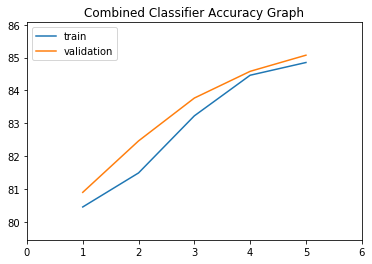

In [60]:
# Train and Evaluate the Model
main()

In [62]:
# Test our Neural Net Model on the test set (which is data the algorithm hasn't seen).

# To load a saved model use the warm_start_from parameter when creating an estimator. 
# This allows you to load a pre-trained model 
model = tf.estimator.DNNLinearCombinedClassifier(model_dir=model_dirs['combined'],
                                                 linear_feature_columns=build_logistic_model_columns(),
                                                 dnn_feature_columns=build_deep_neural_net_model_columns(),
                                                 dnn_hidden_units=define_hidden_units(),
                                                 warm_start_from=model_dirs['combined']) # Changed model directory 


print("Combined Model Results on Unseen Data\n")
test_results = model.evaluate(input_fn=predict_input_fn)
print(test_results, "\n\n")


print("Combined Model Predictions\n")
i = 1
for prediction in model.predict(input_fn=predict_input_fn, predict_keys="classes"):  
    print(i, " : ", prediction["classes"])
    i = i + 1


Combined Model Results on Unseen Data

Parsing ./data/test/test_dataframe.csv
{'accuracy': 0.8635219, 'accuracy_baseline': 1.0, 'auc': 1.0, 'auc_precision_recall': 0.0, 'average_loss': 0.85602534, 'label/mean': 0.0, 'loss': 34.159187, 'prediction/mean': 0.23658943, 'global_step': 3260} 


Combined Model Predictions

Parsing ./data/test/test_dataframe.csv
1  :  [b'0']
2  :  [b'0']
3  :  [b'0']
4  :  [b'1']
5  :  [b'0']
6  :  [b'0']
7  :  [b'0']
8  :  [b'0']
9  :  [b'0']
10  :  [b'0']
11  :  [b'0']
12  :  [b'1']
13  :  [b'0']
14  :  [b'0']
15  :  [b'0']
16  :  [b'1']
17  :  [b'0']
18  :  [b'0']
19  :  [b'0']
20  :  [b'1']
21  :  [b'0']
22  :  [b'0']
23  :  [b'0']
24  :  [b'0']
25  :  [b'0']
26  :  [b'1']
27  :  [b'0']
28  :  [b'0']
29  :  [b'0']
30  :  [b'0']
31  :  [b'1']
32  :  [b'0']
33  :  [b'0']
34  :  [b'0']
35  :  [b'0']
36  :  [b'0']
37  :  [b'1']
38  :  [b'0']
39  :  [b'0']
40  :  [b'0']
41  :  [b'1']
42  :  [b'1']
43  :  [b'0']
44  :  [b'0']
45  :  [b'0']
46  :  [b'0']
47  :  [

981  :  [b'0']
982  :  [b'0']
983  :  [b'0']
984  :  [b'0']
985  :  [b'0']
986  :  [b'0']
987  :  [b'0']
988  :  [b'0']
989  :  [b'0']
990  :  [b'0']
991  :  [b'0']
992  :  [b'0']
993  :  [b'1']
994  :  [b'1']
995  :  [b'1']
996  :  [b'0']
997  :  [b'0']
998  :  [b'0']
999  :  [b'1']
1000  :  [b'0']
1001  :  [b'0']
1002  :  [b'0']
1003  :  [b'0']
1004  :  [b'0']
1005  :  [b'0']
1006  :  [b'0']
1007  :  [b'0']
1008  :  [b'0']
1009  :  [b'1']
1010  :  [b'0']
1011  :  [b'0']
1012  :  [b'0']
1013  :  [b'1']
1014  :  [b'0']
1015  :  [b'0']
1016  :  [b'1']
1017  :  [b'0']
1018  :  [b'0']
1019  :  [b'0']
1020  :  [b'0']
1021  :  [b'1']
1022  :  [b'0']
1023  :  [b'0']
1024  :  [b'0']
1025  :  [b'0']
1026  :  [b'1']
1027  :  [b'0']
1028  :  [b'0']
1029  :  [b'0']
1030  :  [b'0']
1031  :  [b'0']
1032  :  [b'0']
1033  :  [b'0']
1034  :  [b'0']
1035  :  [b'0']
1036  :  [b'0']
1037  :  [b'0']
1038  :  [b'0']
1039  :  [b'0']
1040  :  [b'0']
1041  :  [b'1']
1042  :  [b'0']
1043  :  [b'0']
1044  :  [b

1673  :  [b'0']
1674  :  [b'1']
1675  :  [b'0']
1676  :  [b'0']
1677  :  [b'0']
1678  :  [b'0']
1679  :  [b'0']
1680  :  [b'0']
1681  :  [b'0']
1682  :  [b'0']
1683  :  [b'0']
1684  :  [b'0']
1685  :  [b'0']
1686  :  [b'0']
1687  :  [b'0']
1688  :  [b'0']
1689  :  [b'0']
1690  :  [b'1']
1691  :  [b'0']
1692  :  [b'0']
1693  :  [b'0']
1694  :  [b'0']
1695  :  [b'0']
1696  :  [b'0']
1697  :  [b'0']
1698  :  [b'0']
1699  :  [b'1']
1700  :  [b'1']
1701  :  [b'0']
1702  :  [b'0']
1703  :  [b'0']
1704  :  [b'0']
1705  :  [b'0']
1706  :  [b'1']
1707  :  [b'1']
1708  :  [b'0']
1709  :  [b'1']
1710  :  [b'0']
1711  :  [b'0']
1712  :  [b'0']
1713  :  [b'0']
1714  :  [b'1']
1715  :  [b'0']
1716  :  [b'0']
1717  :  [b'1']
1718  :  [b'0']
1719  :  [b'0']
1720  :  [b'0']
1721  :  [b'1']
1722  :  [b'0']
1723  :  [b'0']
1724  :  [b'0']
1725  :  [b'0']
1726  :  [b'0']
1727  :  [b'1']
1728  :  [b'0']
1729  :  [b'1']
1730  :  [b'0']
1731  :  [b'0']
1732  :  [b'1']
1733  :  [b'0']
1734  :  [b'0']
1735  : 

2289  :  [b'0']
2290  :  [b'0']
2291  :  [b'0']
2292  :  [b'1']
2293  :  [b'0']
2294  :  [b'1']
2295  :  [b'0']
2296  :  [b'0']
2297  :  [b'0']
2298  :  [b'1']
2299  :  [b'1']
2300  :  [b'0']
2301  :  [b'0']
2302  :  [b'0']
2303  :  [b'1']
2304  :  [b'0']
2305  :  [b'1']
2306  :  [b'1']
2307  :  [b'0']
2308  :  [b'0']
2309  :  [b'0']
2310  :  [b'0']
2311  :  [b'1']
2312  :  [b'0']
2313  :  [b'0']
2314  :  [b'0']
2315  :  [b'0']
2316  :  [b'1']
2317  :  [b'1']
2318  :  [b'0']
2319  :  [b'0']
2320  :  [b'0']
2321  :  [b'1']
2322  :  [b'0']
2323  :  [b'0']
2324  :  [b'0']
2325  :  [b'0']
2326  :  [b'0']
2327  :  [b'0']
2328  :  [b'0']
2329  :  [b'0']
2330  :  [b'1']
2331  :  [b'1']
2332  :  [b'0']
2333  :  [b'0']
2334  :  [b'0']
2335  :  [b'1']
2336  :  [b'0']
2337  :  [b'0']
2338  :  [b'0']
2339  :  [b'0']
2340  :  [b'0']
2341  :  [b'0']
2342  :  [b'1']
2343  :  [b'0']
2344  :  [b'1']
2345  :  [b'0']
2346  :  [b'1']
2347  :  [b'0']
2348  :  [b'0']
2349  :  [b'0']
2350  :  [b'0']
2351  : 

2991  :  [b'0']
2992  :  [b'0']
2993  :  [b'0']
2994  :  [b'0']
2995  :  [b'0']
2996  :  [b'0']
2997  :  [b'0']
2998  :  [b'0']
2999  :  [b'0']
3000  :  [b'0']
3001  :  [b'0']
3002  :  [b'1']
3003  :  [b'0']
3004  :  [b'0']
3005  :  [b'0']
3006  :  [b'0']
3007  :  [b'0']
3008  :  [b'0']
3009  :  [b'0']
3010  :  [b'0']
3011  :  [b'0']
3012  :  [b'0']
3013  :  [b'0']
3014  :  [b'0']
3015  :  [b'0']
3016  :  [b'0']
3017  :  [b'0']
3018  :  [b'0']
3019  :  [b'0']
3020  :  [b'0']
3021  :  [b'0']
3022  :  [b'1']
3023  :  [b'0']
3024  :  [b'0']
3025  :  [b'1']
3026  :  [b'0']
3027  :  [b'0']
3028  :  [b'1']
3029  :  [b'0']
3030  :  [b'0']
3031  :  [b'0']
3032  :  [b'0']
3033  :  [b'0']
3034  :  [b'0']
3035  :  [b'0']
3036  :  [b'0']
3037  :  [b'0']
3038  :  [b'0']
3039  :  [b'0']
3040  :  [b'0']
3041  :  [b'1']
3042  :  [b'0']
3043  :  [b'0']
3044  :  [b'0']
3045  :  [b'0']
3046  :  [b'1']
3047  :  [b'0']
3048  :  [b'0']
3049  :  [b'1']
3050  :  [b'0']
3051  :  [b'0']
3052  :  [b'0']
3053  : 

3609  :  [b'1']
3610  :  [b'0']
3611  :  [b'0']
3612  :  [b'0']
3613  :  [b'0']
3614  :  [b'0']
3615  :  [b'0']
3616  :  [b'1']
3617  :  [b'0']
3618  :  [b'0']
3619  :  [b'0']
3620  :  [b'1']
3621  :  [b'0']
3622  :  [b'0']
3623  :  [b'0']
3624  :  [b'0']
3625  :  [b'0']
3626  :  [b'0']
3627  :  [b'0']
3628  :  [b'0']
3629  :  [b'0']
3630  :  [b'0']
3631  :  [b'0']
3632  :  [b'0']
3633  :  [b'0']
3634  :  [b'0']
3635  :  [b'0']
3636  :  [b'0']
3637  :  [b'0']
3638  :  [b'0']
3639  :  [b'0']
3640  :  [b'0']
3641  :  [b'1']
3642  :  [b'0']
3643  :  [b'0']
3644  :  [b'0']
3645  :  [b'0']
3646  :  [b'1']
3647  :  [b'0']
3648  :  [b'0']
3649  :  [b'0']
3650  :  [b'1']
3651  :  [b'0']
3652  :  [b'0']
3653  :  [b'0']
3654  :  [b'1']
3655  :  [b'0']
3656  :  [b'0']
3657  :  [b'0']
3658  :  [b'0']
3659  :  [b'0']
3660  :  [b'0']
3661  :  [b'0']
3662  :  [b'0']
3663  :  [b'0']
3664  :  [b'1']
3665  :  [b'0']
3666  :  [b'0']
3667  :  [b'0']
3668  :  [b'0']
3669  :  [b'0']
3670  :  [b'0']
3671  : 

4240  :  [b'0']
4241  :  [b'0']
4242  :  [b'0']
4243  :  [b'0']
4244  :  [b'0']
4245  :  [b'0']
4246  :  [b'0']
4247  :  [b'0']
4248  :  [b'0']
4249  :  [b'0']
4250  :  [b'0']
4251  :  [b'0']
4252  :  [b'0']
4253  :  [b'0']
4254  :  [b'0']
4255  :  [b'0']
4256  :  [b'0']
4257  :  [b'1']
4258  :  [b'0']
4259  :  [b'0']
4260  :  [b'0']
4261  :  [b'0']
4262  :  [b'0']
4263  :  [b'0']
4264  :  [b'0']
4265  :  [b'0']
4266  :  [b'0']
4267  :  [b'0']
4268  :  [b'0']
4269  :  [b'0']
4270  :  [b'0']
4271  :  [b'0']
4272  :  [b'0']
4273  :  [b'1']
4274  :  [b'0']
4275  :  [b'0']
4276  :  [b'1']
4277  :  [b'0']
4278  :  [b'0']
4279  :  [b'0']
4280  :  [b'1']
4281  :  [b'0']
4282  :  [b'0']
4283  :  [b'1']
4284  :  [b'0']
4285  :  [b'0']
4286  :  [b'0']
4287  :  [b'0']
4288  :  [b'1']
4289  :  [b'0']
4290  :  [b'0']
4291  :  [b'0']
4292  :  [b'0']
4293  :  [b'0']
4294  :  [b'0']
4295  :  [b'0']
4296  :  [b'0']
4297  :  [b'0']
4298  :  [b'0']
4299  :  [b'0']
4300  :  [b'0']
4301  :  [b'0']
4302  : 

4830  :  [b'0']
4831  :  [b'0']
4832  :  [b'0']
4833  :  [b'0']
4834  :  [b'0']
4835  :  [b'0']
4836  :  [b'0']
4837  :  [b'0']
4838  :  [b'0']
4839  :  [b'0']
4840  :  [b'1']
4841  :  [b'0']
4842  :  [b'0']
4843  :  [b'0']
4844  :  [b'0']
4845  :  [b'1']
4846  :  [b'0']
4847  :  [b'0']
4848  :  [b'0']
4849  :  [b'1']
4850  :  [b'0']
4851  :  [b'0']
4852  :  [b'0']
4853  :  [b'0']
4854  :  [b'0']
4855  :  [b'1']
4856  :  [b'1']
4857  :  [b'0']
4858  :  [b'0']
4859  :  [b'0']
4860  :  [b'1']
4861  :  [b'0']
4862  :  [b'0']
4863  :  [b'0']
4864  :  [b'1']
4865  :  [b'0']
4866  :  [b'0']
4867  :  [b'0']
4868  :  [b'0']
4869  :  [b'1']
4870  :  [b'1']
4871  :  [b'0']
4872  :  [b'0']
4873  :  [b'0']
4874  :  [b'0']
4875  :  [b'0']
4876  :  [b'0']
4877  :  [b'0']
4878  :  [b'0']
4879  :  [b'0']
4880  :  [b'0']
4881  :  [b'1']
4882  :  [b'0']
4883  :  [b'0']
4884  :  [b'1']
4885  :  [b'0']
4886  :  [b'0']
4887  :  [b'0']
4888  :  [b'0']
4889  :  [b'0']
4890  :  [b'0']
4891  :  [b'0']
4892  : 

5491  :  [b'0']
5492  :  [b'0']
5493  :  [b'0']
5494  :  [b'1']
5495  :  [b'1']
5496  :  [b'0']
5497  :  [b'0']
5498  :  [b'0']
5499  :  [b'0']
5500  :  [b'1']
5501  :  [b'0']
5502  :  [b'1']
5503  :  [b'0']
5504  :  [b'0']
5505  :  [b'0']
5506  :  [b'0']
5507  :  [b'1']
5508  :  [b'0']
5509  :  [b'0']
5510  :  [b'0']
5511  :  [b'1']
5512  :  [b'0']
5513  :  [b'0']
5514  :  [b'0']
5515  :  [b'0']
5516  :  [b'0']
5517  :  [b'0']
5518  :  [b'0']
5519  :  [b'0']
5520  :  [b'0']
5521  :  [b'0']
5522  :  [b'0']
5523  :  [b'0']
5524  :  [b'0']
5525  :  [b'0']
5526  :  [b'0']
5527  :  [b'0']
5528  :  [b'0']
5529  :  [b'0']
5530  :  [b'0']
5531  :  [b'0']
5532  :  [b'0']
5533  :  [b'0']
5534  :  [b'0']
5535  :  [b'1']
5536  :  [b'1']
5537  :  [b'0']
5538  :  [b'0']
5539  :  [b'0']
5540  :  [b'1']
5541  :  [b'0']
5542  :  [b'0']
5543  :  [b'0']
5544  :  [b'0']
5545  :  [b'0']
5546  :  [b'0']
5547  :  [b'0']
5548  :  [b'0']
5549  :  [b'0']
5550  :  [b'0']
5551  :  [b'0']
5552  :  [b'0']
5553  : 

6173  :  [b'0']
6174  :  [b'0']
6175  :  [b'0']
6176  :  [b'0']
6177  :  [b'0']
6178  :  [b'1']
6179  :  [b'0']
6180  :  [b'0']
6181  :  [b'0']
6182  :  [b'0']
6183  :  [b'1']
6184  :  [b'0']
6185  :  [b'0']
6186  :  [b'0']
6187  :  [b'0']
6188  :  [b'0']
6189  :  [b'0']
6190  :  [b'0']
6191  :  [b'0']
6192  :  [b'0']
6193  :  [b'0']
6194  :  [b'0']
6195  :  [b'0']
6196  :  [b'0']
6197  :  [b'0']
6198  :  [b'1']
6199  :  [b'0']
6200  :  [b'0']
6201  :  [b'0']
6202  :  [b'0']
6203  :  [b'0']
6204  :  [b'0']
6205  :  [b'0']
6206  :  [b'0']
6207  :  [b'0']
6208  :  [b'0']
6209  :  [b'0']
6210  :  [b'0']
6211  :  [b'0']
6212  :  [b'0']
6213  :  [b'0']
6214  :  [b'0']
6215  :  [b'0']
6216  :  [b'0']
6217  :  [b'0']
6218  :  [b'0']
6219  :  [b'0']
6220  :  [b'0']
6221  :  [b'0']
6222  :  [b'0']
6223  :  [b'0']
6224  :  [b'0']
6225  :  [b'0']
6226  :  [b'0']
6227  :  [b'0']
6228  :  [b'0']
6229  :  [b'0']
6230  :  [b'1']
6231  :  [b'0']
6232  :  [b'0']
6233  :  [b'0']
6234  :  [b'0']
6235  : 

6796  :  [b'0']
6797  :  [b'0']
6798  :  [b'0']
6799  :  [b'0']
6800  :  [b'1']
6801  :  [b'0']
6802  :  [b'0']
6803  :  [b'0']
6804  :  [b'0']
6805  :  [b'0']
6806  :  [b'0']
6807  :  [b'0']
6808  :  [b'0']
6809  :  [b'0']
6810  :  [b'1']
6811  :  [b'0']
6812  :  [b'0']
6813  :  [b'0']
6814  :  [b'0']
6815  :  [b'1']
6816  :  [b'0']
6817  :  [b'1']
6818  :  [b'0']
6819  :  [b'0']
6820  :  [b'0']
6821  :  [b'0']
6822  :  [b'0']
6823  :  [b'0']
6824  :  [b'0']
6825  :  [b'0']
6826  :  [b'0']
6827  :  [b'0']
6828  :  [b'0']
6829  :  [b'0']
6830  :  [b'0']
6831  :  [b'0']
6832  :  [b'0']
6833  :  [b'0']
6834  :  [b'0']
6835  :  [b'1']
6836  :  [b'0']
6837  :  [b'1']
6838  :  [b'0']
6839  :  [b'0']
6840  :  [b'0']
6841  :  [b'0']
6842  :  [b'0']
6843  :  [b'0']
6844  :  [b'0']
6845  :  [b'0']
6846  :  [b'0']
6847  :  [b'0']
6848  :  [b'0']
6849  :  [b'0']
6850  :  [b'0']
6851  :  [b'0']
6852  :  [b'0']
6853  :  [b'0']
6854  :  [b'0']
6855  :  [b'0']
6856  :  [b'0']
6857  :  [b'0']
6858  : 

7503  :  [b'0']
7504  :  [b'0']
7505  :  [b'0']
7506  :  [b'0']
7507  :  [b'0']
7508  :  [b'1']
7509  :  [b'0']
7510  :  [b'1']
7511  :  [b'1']
7512  :  [b'0']
7513  :  [b'0']
7514  :  [b'0']
7515  :  [b'0']
7516  :  [b'0']
7517  :  [b'1']
7518  :  [b'0']
7519  :  [b'1']
7520  :  [b'0']
7521  :  [b'0']
7522  :  [b'0']
7523  :  [b'0']
7524  :  [b'0']
7525  :  [b'0']
7526  :  [b'0']
7527  :  [b'0']
7528  :  [b'0']
7529  :  [b'1']
7530  :  [b'0']
7531  :  [b'1']
7532  :  [b'0']
7533  :  [b'0']
7534  :  [b'0']
7535  :  [b'0']
7536  :  [b'0']
7537  :  [b'0']
7538  :  [b'0']
7539  :  [b'0']
7540  :  [b'0']
7541  :  [b'0']
7542  :  [b'0']
7543  :  [b'0']
7544  :  [b'0']
7545  :  [b'0']
7546  :  [b'1']
7547  :  [b'0']
7548  :  [b'0']
7549  :  [b'0']
7550  :  [b'0']
7551  :  [b'1']
7552  :  [b'1']
7553  :  [b'1']
7554  :  [b'0']
7555  :  [b'0']
7556  :  [b'0']
7557  :  [b'0']
7558  :  [b'0']
7559  :  [b'1']
7560  :  [b'0']
7561  :  [b'0']
7562  :  [b'0']
7563  :  [b'1']
7564  :  [b'0']
7565  : 

8168  :  [b'1']
8169  :  [b'0']
8170  :  [b'0']
8171  :  [b'0']
8172  :  [b'0']
8173  :  [b'0']
8174  :  [b'1']
8175  :  [b'0']
8176  :  [b'0']
8177  :  [b'0']
8178  :  [b'1']
8179  :  [b'0']
8180  :  [b'0']
8181  :  [b'0']
8182  :  [b'0']
8183  :  [b'0']
8184  :  [b'0']
8185  :  [b'1']
8186  :  [b'0']
8187  :  [b'0']
8188  :  [b'1']
8189  :  [b'0']
8190  :  [b'0']
8191  :  [b'0']
8192  :  [b'0']
8193  :  [b'0']
8194  :  [b'0']
8195  :  [b'0']
8196  :  [b'0']
8197  :  [b'0']
8198  :  [b'0']
8199  :  [b'0']
8200  :  [b'0']
8201  :  [b'0']
8202  :  [b'1']
8203  :  [b'0']
8204  :  [b'0']
8205  :  [b'0']
8206  :  [b'0']
8207  :  [b'0']
8208  :  [b'0']
8209  :  [b'0']
8210  :  [b'0']
8211  :  [b'0']
8212  :  [b'0']
8213  :  [b'0']
8214  :  [b'0']
8215  :  [b'1']
8216  :  [b'1']
8217  :  [b'0']
8218  :  [b'0']
8219  :  [b'0']
8220  :  [b'0']
8221  :  [b'0']
8222  :  [b'1']
8223  :  [b'0']
8224  :  [b'0']
8225  :  [b'0']
8226  :  [b'0']
8227  :  [b'0']
8228  :  [b'0']
8229  :  [b'0']
8230  : 

8828  :  [b'0']
8829  :  [b'0']
8830  :  [b'0']
8831  :  [b'0']
8832  :  [b'0']
8833  :  [b'0']
8834  :  [b'0']
8835  :  [b'0']
8836  :  [b'0']
8837  :  [b'0']
8838  :  [b'0']
8839  :  [b'0']
8840  :  [b'0']
8841  :  [b'1']
8842  :  [b'0']
8843  :  [b'0']
8844  :  [b'0']
8845  :  [b'0']
8846  :  [b'0']
8847  :  [b'0']
8848  :  [b'0']
8849  :  [b'0']
8850  :  [b'0']
8851  :  [b'1']
8852  :  [b'0']
8853  :  [b'0']
8854  :  [b'0']
8855  :  [b'0']
8856  :  [b'1']
8857  :  [b'0']
8858  :  [b'0']
8859  :  [b'0']
8860  :  [b'1']
8861  :  [b'0']
8862  :  [b'1']
8863  :  [b'0']
8864  :  [b'0']
8865  :  [b'0']
8866  :  [b'0']
8867  :  [b'0']
8868  :  [b'0']
8869  :  [b'0']
8870  :  [b'0']
8871  :  [b'0']
8872  :  [b'0']
8873  :  [b'0']
8874  :  [b'0']
8875  :  [b'0']
8876  :  [b'0']
8877  :  [b'0']
8878  :  [b'1']
8879  :  [b'0']
8880  :  [b'0']
8881  :  [b'0']
8882  :  [b'0']
8883  :  [b'0']
8884  :  [b'1']
8885  :  [b'0']
8886  :  [b'0']
8887  :  [b'0']
8888  :  [b'0']
8889  :  [b'0']
8890  : 

9493  :  [b'0']
9494  :  [b'0']
9495  :  [b'0']
9496  :  [b'0']
9497  :  [b'1']
9498  :  [b'0']
9499  :  [b'0']
9500  :  [b'0']
9501  :  [b'0']
9502  :  [b'0']
9503  :  [b'0']
9504  :  [b'0']
9505  :  [b'0']
9506  :  [b'1']
9507  :  [b'0']
9508  :  [b'0']
9509  :  [b'0']
9510  :  [b'0']
9511  :  [b'0']
9512  :  [b'0']
9513  :  [b'0']
9514  :  [b'0']
9515  :  [b'0']
9516  :  [b'0']
9517  :  [b'0']
9518  :  [b'0']
9519  :  [b'0']
9520  :  [b'0']
9521  :  [b'0']
9522  :  [b'1']
9523  :  [b'0']
9524  :  [b'0']
9525  :  [b'0']
9526  :  [b'1']
9527  :  [b'0']
9528  :  [b'0']
9529  :  [b'0']
9530  :  [b'0']
9531  :  [b'0']
9532  :  [b'0']
9533  :  [b'0']
9534  :  [b'0']
9535  :  [b'0']
9536  :  [b'0']
9537  :  [b'0']
9538  :  [b'0']
9539  :  [b'0']
9540  :  [b'0']
9541  :  [b'1']
9542  :  [b'0']
9543  :  [b'0']
9544  :  [b'0']
9545  :  [b'0']
9546  :  [b'0']
9547  :  [b'0']
9548  :  [b'0']
9549  :  [b'0']
9550  :  [b'0']
9551  :  [b'0']
9552  :  [b'0']
9553  :  [b'0']
9554  :  [b'0']
9555  : 

10139  :  [b'0']
10140  :  [b'0']
10141  :  [b'0']
10142  :  [b'0']
10143  :  [b'1']
10144  :  [b'0']
10145  :  [b'0']
10146  :  [b'0']
10147  :  [b'0']
10148  :  [b'0']
10149  :  [b'0']
10150  :  [b'0']
10151  :  [b'0']
10152  :  [b'0']
10153  :  [b'0']
10154  :  [b'1']
10155  :  [b'1']
10156  :  [b'1']
10157  :  [b'0']
10158  :  [b'0']
10159  :  [b'0']
10160  :  [b'0']
10161  :  [b'0']
10162  :  [b'0']
10163  :  [b'0']
10164  :  [b'0']
10165  :  [b'0']
10166  :  [b'0']
10167  :  [b'0']
10168  :  [b'0']
10169  :  [b'0']
10170  :  [b'0']
10171  :  [b'0']
10172  :  [b'0']
10173  :  [b'0']
10174  :  [b'0']
10175  :  [b'1']
10176  :  [b'0']
10177  :  [b'0']
10178  :  [b'0']
10179  :  [b'0']
10180  :  [b'0']
10181  :  [b'0']
10182  :  [b'1']
10183  :  [b'0']
10184  :  [b'0']
10185  :  [b'0']
10186  :  [b'0']
10187  :  [b'0']
10188  :  [b'1']
10189  :  [b'0']
10190  :  [b'0']
10191  :  [b'0']
10192  :  [b'0']
10193  :  [b'0']
10194  :  [b'0']
10195  :  [b'1']
10196  :  [b'0']
10197  :  [b'0

10821  :  [b'0']
10822  :  [b'0']
10823  :  [b'0']
10824  :  [b'0']
10825  :  [b'0']
10826  :  [b'0']
10827  :  [b'0']
10828  :  [b'1']
10829  :  [b'0']
10830  :  [b'0']
10831  :  [b'0']
10832  :  [b'0']
10833  :  [b'1']
10834  :  [b'0']
10835  :  [b'0']
10836  :  [b'0']
10837  :  [b'0']
10838  :  [b'0']
10839  :  [b'0']
10840  :  [b'0']
10841  :  [b'1']
10842  :  [b'0']
10843  :  [b'0']
10844  :  [b'0']
10845  :  [b'0']
10846  :  [b'1']
10847  :  [b'0']
10848  :  [b'0']
10849  :  [b'0']
10850  :  [b'0']
10851  :  [b'0']
10852  :  [b'0']
10853  :  [b'0']
10854  :  [b'0']
10855  :  [b'0']
10856  :  [b'0']
10857  :  [b'0']
10858  :  [b'0']
10859  :  [b'1']
10860  :  [b'0']
10861  :  [b'0']
10862  :  [b'0']
10863  :  [b'0']
10864  :  [b'0']
10865  :  [b'0']
10866  :  [b'0']
10867  :  [b'0']
10868  :  [b'0']
10869  :  [b'1']
10870  :  [b'0']
10871  :  [b'0']
10872  :  [b'0']
10873  :  [b'0']
10874  :  [b'0']
10875  :  [b'0']
10876  :  [b'0']
10877  :  [b'0']
10878  :  [b'0']
10879  :  [b'1

11463  :  [b'0']
11464  :  [b'0']
11465  :  [b'0']
11466  :  [b'0']
11467  :  [b'0']
11468  :  [b'0']
11469  :  [b'0']
11470  :  [b'0']
11471  :  [b'0']
11472  :  [b'0']
11473  :  [b'0']
11474  :  [b'0']
11475  :  [b'0']
11476  :  [b'0']
11477  :  [b'0']
11478  :  [b'0']
11479  :  [b'0']
11480  :  [b'0']
11481  :  [b'0']
11482  :  [b'0']
11483  :  [b'0']
11484  :  [b'0']
11485  :  [b'0']
11486  :  [b'0']
11487  :  [b'0']
11488  :  [b'0']
11489  :  [b'0']
11490  :  [b'0']
11491  :  [b'0']
11492  :  [b'0']
11493  :  [b'0']
11494  :  [b'0']
11495  :  [b'0']
11496  :  [b'0']
11497  :  [b'0']
11498  :  [b'0']
11499  :  [b'0']
11500  :  [b'0']
11501  :  [b'0']
11502  :  [b'0']
11503  :  [b'0']
11504  :  [b'0']
11505  :  [b'0']
11506  :  [b'0']
11507  :  [b'0']
11508  :  [b'0']
11509  :  [b'0']
11510  :  [b'0']
11511  :  [b'0']
11512  :  [b'1']
11513  :  [b'0']
11514  :  [b'0']
11515  :  [b'0']
11516  :  [b'0']
11517  :  [b'0']
11518  :  [b'0']
11519  :  [b'0']
11520  :  [b'0']
11521  :  [b'0

12154  :  [b'0']
12155  :  [b'1']
12156  :  [b'0']
12157  :  [b'0']
12158  :  [b'0']
12159  :  [b'0']
12160  :  [b'1']
12161  :  [b'0']
12162  :  [b'0']
12163  :  [b'0']
12164  :  [b'0']
12165  :  [b'0']
12166  :  [b'0']
12167  :  [b'0']
12168  :  [b'0']
12169  :  [b'0']
12170  :  [b'0']
12171  :  [b'0']
12172  :  [b'0']
12173  :  [b'0']
12174  :  [b'0']
12175  :  [b'0']
12176  :  [b'0']
12177  :  [b'1']
12178  :  [b'0']
12179  :  [b'0']
12180  :  [b'0']
12181  :  [b'0']
12182  :  [b'0']
12183  :  [b'0']
12184  :  [b'0']
12185  :  [b'0']
12186  :  [b'0']
12187  :  [b'0']
12188  :  [b'0']
12189  :  [b'1']
12190  :  [b'0']
12191  :  [b'0']
12192  :  [b'1']
12193  :  [b'0']
12194  :  [b'0']
12195  :  [b'0']
12196  :  [b'0']
12197  :  [b'0']
12198  :  [b'0']
12199  :  [b'0']
12200  :  [b'0']
12201  :  [b'0']
12202  :  [b'0']
12203  :  [b'0']
12204  :  [b'0']
12205  :  [b'0']
12206  :  [b'0']
12207  :  [b'0']
12208  :  [b'0']
12209  :  [b'0']
12210  :  [b'0']
12211  :  [b'0']
12212  :  [b'1

12768  :  [b'0']
12769  :  [b'0']
12770  :  [b'0']
12771  :  [b'0']
12772  :  [b'1']
12773  :  [b'0']
12774  :  [b'0']
12775  :  [b'0']
12776  :  [b'1']
12777  :  [b'0']
12778  :  [b'0']
12779  :  [b'0']
12780  :  [b'0']
12781  :  [b'0']
12782  :  [b'0']
12783  :  [b'0']
12784  :  [b'0']
12785  :  [b'0']
12786  :  [b'0']
12787  :  [b'0']
12788  :  [b'0']
12789  :  [b'0']
12790  :  [b'0']
12791  :  [b'0']
12792  :  [b'0']
12793  :  [b'0']
12794  :  [b'0']
12795  :  [b'0']
12796  :  [b'0']
12797  :  [b'0']
12798  :  [b'0']
12799  :  [b'0']
12800  :  [b'0']
12801  :  [b'0']
12802  :  [b'0']
12803  :  [b'0']
12804  :  [b'0']
12805  :  [b'0']
12806  :  [b'0']
12807  :  [b'0']
12808  :  [b'0']
12809  :  [b'0']
12810  :  [b'0']
12811  :  [b'0']
12812  :  [b'0']
12813  :  [b'0']
12814  :  [b'0']
12815  :  [b'0']
12816  :  [b'0']
12817  :  [b'0']
12818  :  [b'1']
12819  :  [b'0']
12820  :  [b'1']
12821  :  [b'0']
12822  :  [b'0']
12823  :  [b'0']
12824  :  [b'0']
12825  :  [b'0']
12826  :  [b'0

13427  :  [b'0']
13428  :  [b'0']
13429  :  [b'0']
13430  :  [b'0']
13431  :  [b'0']
13432  :  [b'0']
13433  :  [b'0']
13434  :  [b'0']
13435  :  [b'0']
13436  :  [b'0']
13437  :  [b'0']
13438  :  [b'0']
13439  :  [b'0']
13440  :  [b'0']
13441  :  [b'1']
13442  :  [b'1']
13443  :  [b'1']
13444  :  [b'0']
13445  :  [b'1']
13446  :  [b'0']
13447  :  [b'0']
13448  :  [b'0']
13449  :  [b'0']
13450  :  [b'0']
13451  :  [b'0']
13452  :  [b'0']
13453  :  [b'0']
13454  :  [b'0']
13455  :  [b'1']
13456  :  [b'1']
13457  :  [b'0']
13458  :  [b'1']
13459  :  [b'0']
13460  :  [b'0']
13461  :  [b'0']
13462  :  [b'0']
13463  :  [b'1']
13464  :  [b'0']
13465  :  [b'1']
13466  :  [b'0']
13467  :  [b'0']
13468  :  [b'0']
13469  :  [b'0']
13470  :  [b'0']
13471  :  [b'0']
13472  :  [b'0']
13473  :  [b'0']
13474  :  [b'0']
13475  :  [b'0']
13476  :  [b'0']
13477  :  [b'0']
13478  :  [b'0']
13479  :  [b'0']
13480  :  [b'0']
13481  :  [b'0']
13482  :  [b'0']
13483  :  [b'0']
13484  :  [b'0']
13485  :  [b'0

14034  :  [b'0']
14035  :  [b'0']
14036  :  [b'1']
14037  :  [b'0']
14038  :  [b'0']
14039  :  [b'0']
14040  :  [b'0']
14041  :  [b'1']
14042  :  [b'0']
14043  :  [b'0']
14044  :  [b'0']
14045  :  [b'0']
14046  :  [b'0']
14047  :  [b'0']
14048  :  [b'0']
14049  :  [b'1']
14050  :  [b'0']
14051  :  [b'0']
14052  :  [b'0']
14053  :  [b'1']
14054  :  [b'0']
14055  :  [b'1']
14056  :  [b'1']
14057  :  [b'1']
14058  :  [b'1']
14059  :  [b'0']
14060  :  [b'0']
14061  :  [b'0']
14062  :  [b'0']
14063  :  [b'0']
14064  :  [b'0']
14065  :  [b'0']
14066  :  [b'1']
14067  :  [b'1']
14068  :  [b'0']
14069  :  [b'0']
14070  :  [b'0']
14071  :  [b'0']
14072  :  [b'0']
14073  :  [b'0']
14074  :  [b'0']
14075  :  [b'1']
14076  :  [b'0']
14077  :  [b'1']
14078  :  [b'0']
14079  :  [b'0']
14080  :  [b'0']
14081  :  [b'0']
14082  :  [b'0']
14083  :  [b'1']
14084  :  [b'0']
14085  :  [b'0']
14086  :  [b'0']
14087  :  [b'1']
14088  :  [b'0']
14089  :  [b'0']
14090  :  [b'0']
14091  :  [b'1']
14092  :  [b'0

14666  :  [b'0']
14667  :  [b'0']
14668  :  [b'0']
14669  :  [b'0']
14670  :  [b'0']
14671  :  [b'0']
14672  :  [b'1']
14673  :  [b'0']
14674  :  [b'0']
14675  :  [b'0']
14676  :  [b'0']
14677  :  [b'0']
14678  :  [b'0']
14679  :  [b'1']
14680  :  [b'0']
14681  :  [b'0']
14682  :  [b'0']
14683  :  [b'0']
14684  :  [b'0']
14685  :  [b'0']
14686  :  [b'0']
14687  :  [b'0']
14688  :  [b'0']
14689  :  [b'0']
14690  :  [b'0']
14691  :  [b'1']
14692  :  [b'0']
14693  :  [b'1']
14694  :  [b'0']
14695  :  [b'0']
14696  :  [b'0']
14697  :  [b'0']
14698  :  [b'0']
14699  :  [b'0']
14700  :  [b'0']
14701  :  [b'0']
14702  :  [b'0']
14703  :  [b'0']
14704  :  [b'0']
14705  :  [b'0']
14706  :  [b'0']
14707  :  [b'0']
14708  :  [b'0']
14709  :  [b'1']
14710  :  [b'0']
14711  :  [b'0']
14712  :  [b'0']
14713  :  [b'0']
14714  :  [b'0']
14715  :  [b'0']
14716  :  [b'0']
14717  :  [b'0']
14718  :  [b'1']
14719  :  [b'0']
14720  :  [b'0']
14721  :  [b'0']
14722  :  [b'0']
14723  :  [b'0']
14724  :  [b'0

15329  :  [b'0']
15330  :  [b'0']
15331  :  [b'0']
15332  :  [b'0']
15333  :  [b'0']
15334  :  [b'0']
15335  :  [b'0']
15336  :  [b'0']
15337  :  [b'0']
15338  :  [b'0']
15339  :  [b'0']
15340  :  [b'1']
15341  :  [b'0']
15342  :  [b'0']
15343  :  [b'0']
15344  :  [b'0']
15345  :  [b'0']
15346  :  [b'0']
15347  :  [b'0']
15348  :  [b'0']
15349  :  [b'0']
15350  :  [b'0']
15351  :  [b'0']
15352  :  [b'0']
15353  :  [b'0']
15354  :  [b'0']
15355  :  [b'0']
15356  :  [b'0']
15357  :  [b'0']
15358  :  [b'0']
15359  :  [b'0']
15360  :  [b'0']
15361  :  [b'0']
15362  :  [b'0']
15363  :  [b'1']
15364  :  [b'0']
15365  :  [b'0']
15366  :  [b'1']
15367  :  [b'0']
15368  :  [b'0']
15369  :  [b'0']
15370  :  [b'0']
15371  :  [b'0']
15372  :  [b'0']
15373  :  [b'0']
15374  :  [b'0']
15375  :  [b'0']
15376  :  [b'0']
15377  :  [b'0']
15378  :  [b'0']
15379  :  [b'0']
15380  :  [b'1']
15381  :  [b'0']
15382  :  [b'1']
15383  :  [b'0']
15384  :  [b'0']
15385  :  [b'1']
15386  :  [b'0']
15387  :  [b'0

15987  :  [b'0']
15988  :  [b'0']
15989  :  [b'0']
15990  :  [b'1']
15991  :  [b'0']
15992  :  [b'0']
15993  :  [b'0']
15994  :  [b'0']
15995  :  [b'0']
15996  :  [b'0']
15997  :  [b'1']
15998  :  [b'1']
15999  :  [b'0']
16000  :  [b'1']
16001  :  [b'1']
16002  :  [b'0']
16003  :  [b'0']
16004  :  [b'0']
16005  :  [b'0']
16006  :  [b'0']
16007  :  [b'0']
16008  :  [b'0']
16009  :  [b'0']
16010  :  [b'1']
16011  :  [b'0']
16012  :  [b'0']
16013  :  [b'0']
16014  :  [b'0']
16015  :  [b'0']
16016  :  [b'0']
16017  :  [b'0']
16018  :  [b'0']
16019  :  [b'0']
16020  :  [b'0']
16021  :  [b'0']
16022  :  [b'1']
16023  :  [b'0']
16024  :  [b'0']
16025  :  [b'0']
16026  :  [b'0']
16027  :  [b'0']
16028  :  [b'0']
16029  :  [b'1']
16030  :  [b'0']
16031  :  [b'1']
16032  :  [b'0']
16033  :  [b'1']
16034  :  [b'0']
16035  :  [b'0']
16036  :  [b'0']
16037  :  [b'0']
16038  :  [b'1']
16039  :  [b'0']
16040  :  [b'0']
16041  :  [b'1']
16042  :  [b'0']
16043  :  [b'0']
16044  :  [b'0']
16045  :  [b'0

## TensorBoard

TensorBoard is built in functionality from TensorFlow that allow for visualization of the algorithms we build.  We won't delve to deeply into it, but we will briefly show how to access it and show some of the functionality it provides. 

### Running TensorBoard

1. Open Anaconda Prompt
2. Run the command 'tensorboard --logdir=path/to/model/dir' 
    * ** *EX: tensorboard --logdir="C:\Users\levi.conall\Documents\MachineLearning\MLSeries\ML Series Part 1 - Introduction\models\combined"* ** 
3. Open the TensorBoard server 
    * Can be done by running the cell below
    * For GD computers, use Hostname:6006 (hostname = your computer name)
    * localhost:6006 should also work if you are on a personal computer

In [ ]:
#Open Tensorboard in web browswer
import webbrowser
import socket

hostname = socket.gethostname()

tensorboard_url = "http://" + hostname + ":6006"
webbrowser.open(tensorboard_url, new=0, autoraise=True)

## References
1. https://www.tensorflow.org/api_docs/python/tf/contrib/factorization/KMeansClustering

2. https://github.com/tensorflow/models/blob/master/official/wide_deep/wide_deep.py

3. https://www.tensorflow.org/get_started/feature_columns

4. https://developers.googleblog.com/2017/11/introducing-tensorflow-feature-columns.html

5. http://neuralnetworksanddeeplearning.com

6. https://en.wikipedia.org/wiki/Activation_function

7. https://www.amazon.com/Artificial-Intelligence-Modern-Approach-3rd/dp/0136042597
